<h1><b>Libraries</b></h1>

In [370]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
from time import time
from sklearn.exceptions import ConvergenceWarning
#ignore warnings influence output print
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#ML models
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
from sklearn.neural_network import MLPClassifier
import umap.umap_ as umap

<h1><b>File Path</b></h1>

In [371]:
for dirname, _, filenames in os.walk('/Bank_Marketing_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#path for the training set
tr_path = "./Bank_Marketing_Dataset/train.csv"

<h1><b>Preprocessing and Data Analysis</b></h1>

<h2>Read datasets from files</h2>

In [372]:
# read in csv file as a DataFrame
data = pd.read_csv(tr_path)
# explore the first 5 rows
data.head()

age           job   marital            education  default housing loan  \
0   24    management    single    university.degree       no     yes   no   
1   48  entrepreneur   married    university.degree       no     yes   no   
2   29    technician  divorced  professional.course       no      no   no   
3   30   blue-collar   married             basic.4y  unknown     yes   no   
4   44  entrepreneur   married    university.degree       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   apr         thu  ...         1    999         0  nonexistent   
1   cellular   jul         thu  ...         1    999         0  nonexistent   
2   cellular   nov         tue  ...         1    999         1      failure   
3  telephone   may         fri  ...         4    999         0  nonexistent   
4   cellular   nov         wed  ...         2    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          93.075          -47.1      1.410       5099.1  no  
1          1.4          93.918          -42.7      4.968       5228.1  no  
2         -0.1          93.200          -42.0      4.153       5195.8  no  
3          1.1          93.994          -36.4      4.864       5191.0  no  
4         -0.1          93.200          -42.0      4.120       5195.8  no  

[5 rows x 21 columns]

<h2>Missing values</h2>

In [373]:
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [374]:
data.shape  

(5000, 21)

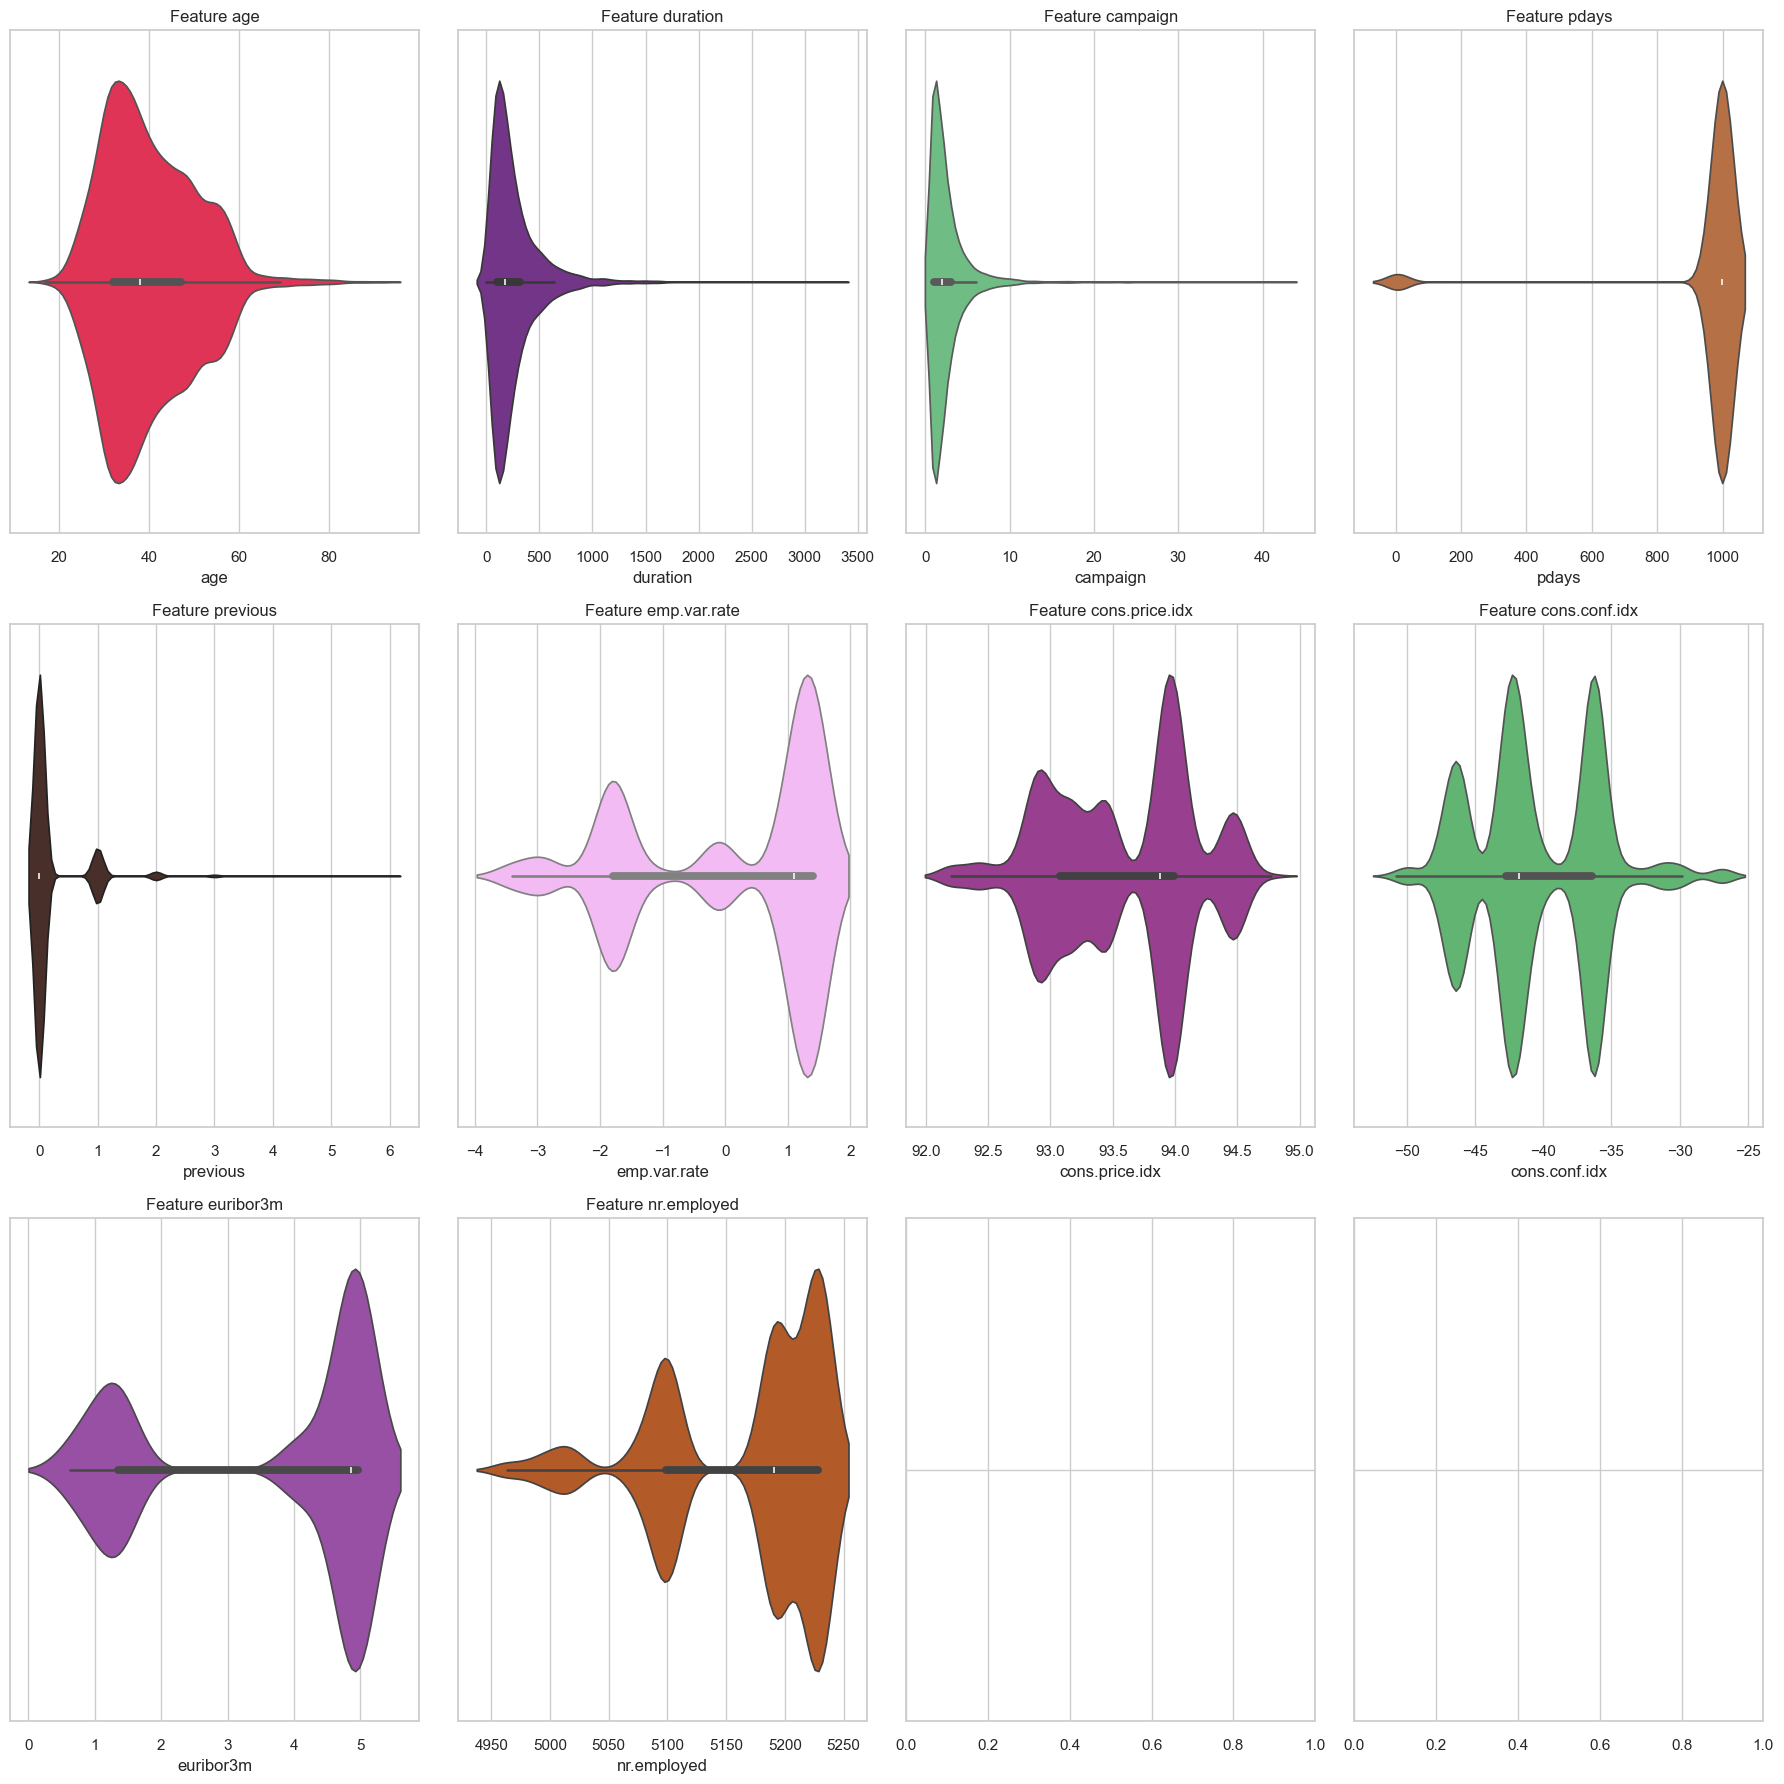

In [375]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(3, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  

plt.tight_layout()
plt.show()

In [320]:
# duration
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['duration'].min()
max_Duration = data['duration'].max()
data.loc[data['duration']<1, 'duration']=min_Duration
data.loc[data['duration']>1000, 'duration']=min_Duration

# campaign
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['campaign'].min()
max_Duration = data['campaign'].max()
data.loc[data['campaign']<1, 'campaign']=min_Duration
data.loc[data['campaign']>10, 'campaign']=min_Duration

# pdays
# Outliers were handled. This can help with cleaning and preparing data
min_Duration = data['pdays'].min()
max_Duration = data['pdays'].max()
data.loc[data['pdays']<1, 'pdays']=0
data.loc[data['pdays']>25, 'pdays']=0

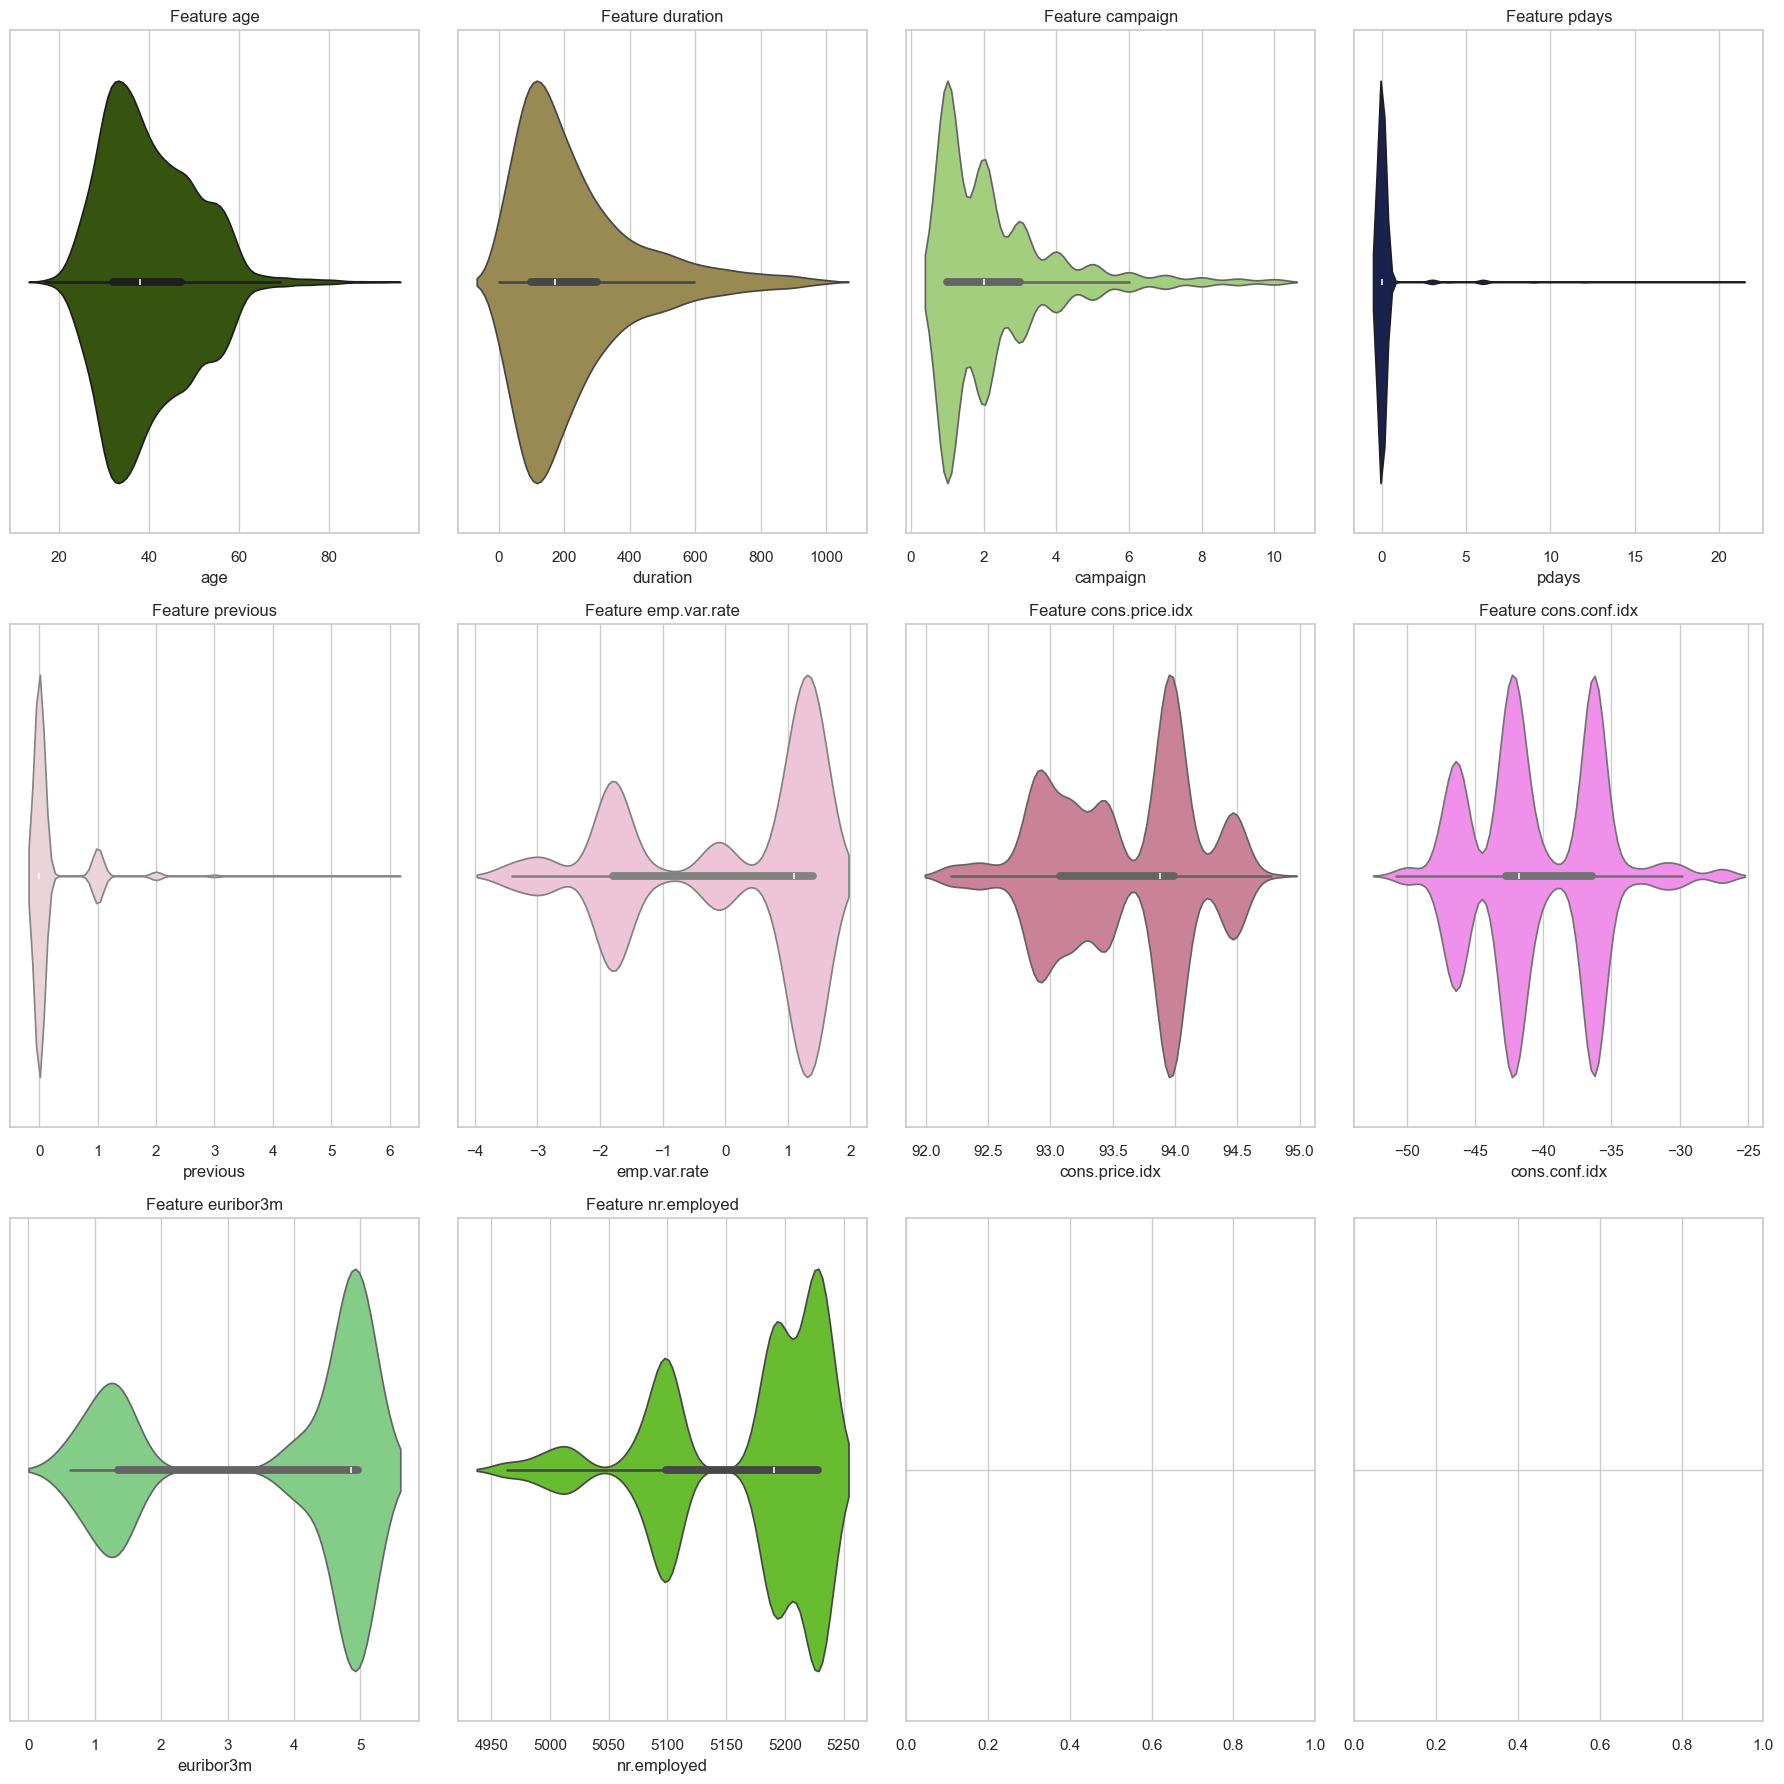

In [321]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(3, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  

plt.tight_layout()
plt.show()

<h2>Data visalization</h2>

In [322]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()
print(num,cat)
#numeric df
loan_num =  data[num]
#categoric df
loan_cat = data[cat]

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

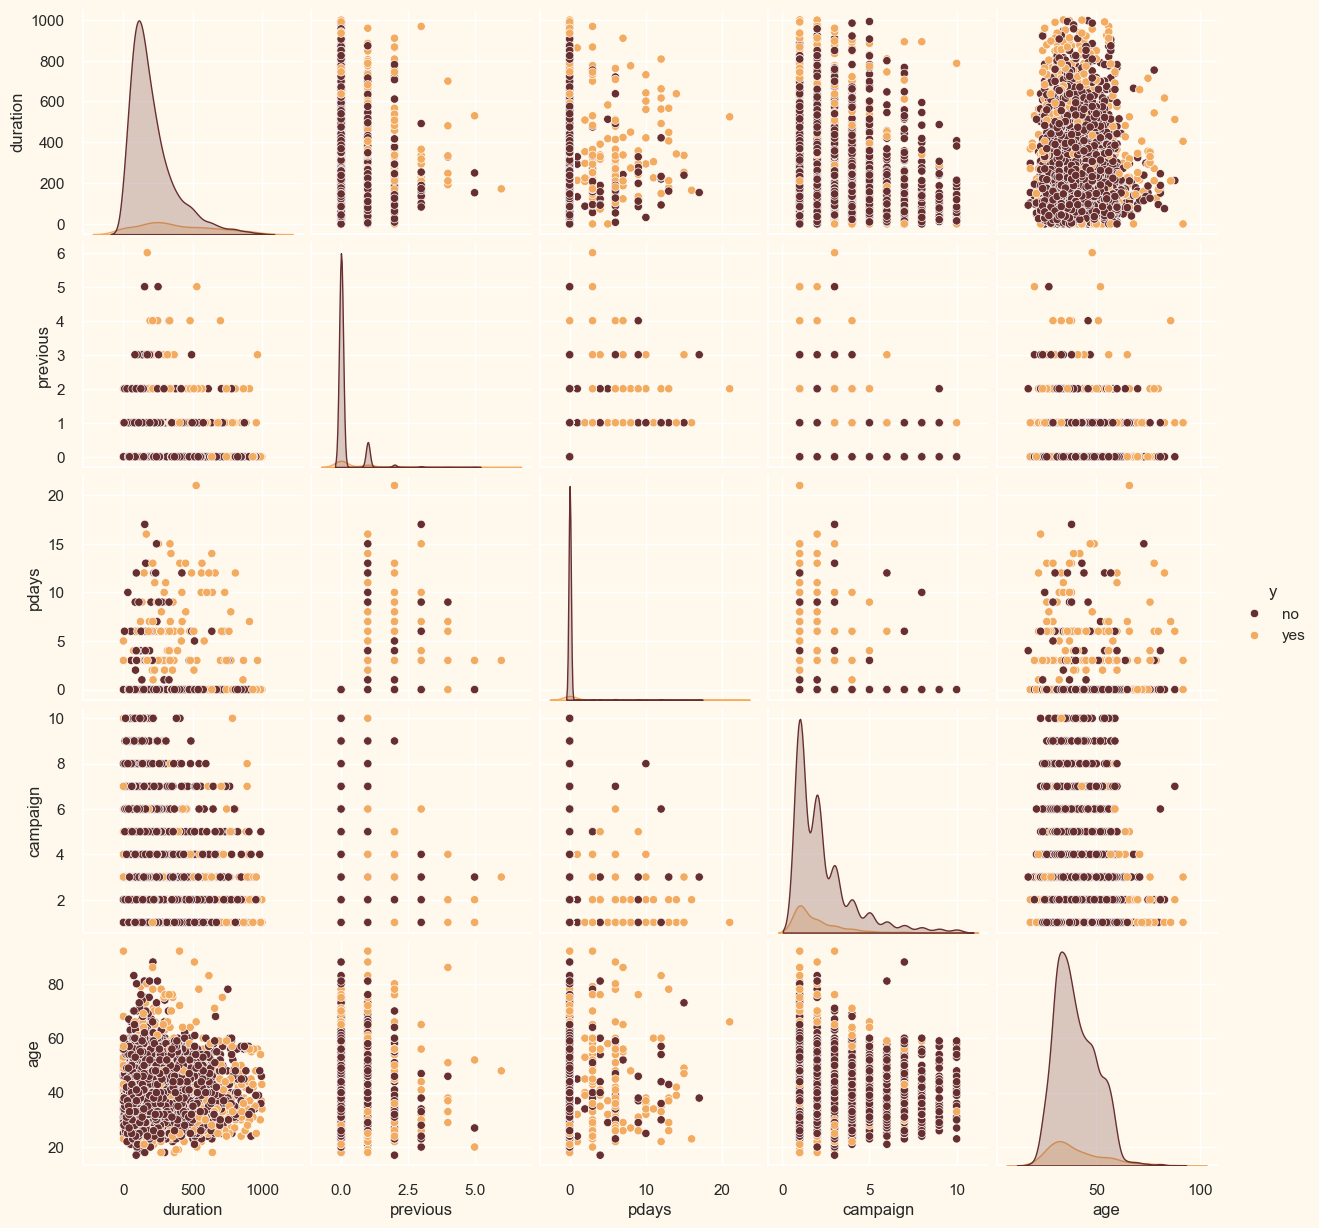

In [323]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "duration", "previous", "pdays", "campaign", "age", "y"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "y",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

y
no     4420
yes     580
Name: count, dtype: int64


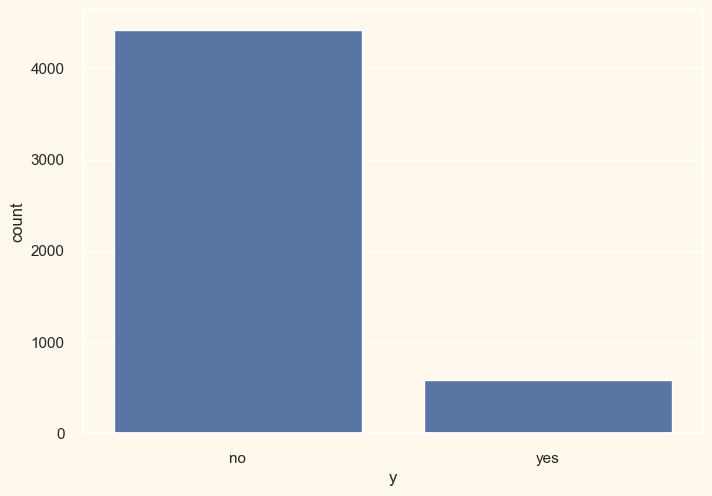

In [324]:
#
sns.countplot(x ='y', data = data)
print(data[cat[-1]].value_counts())

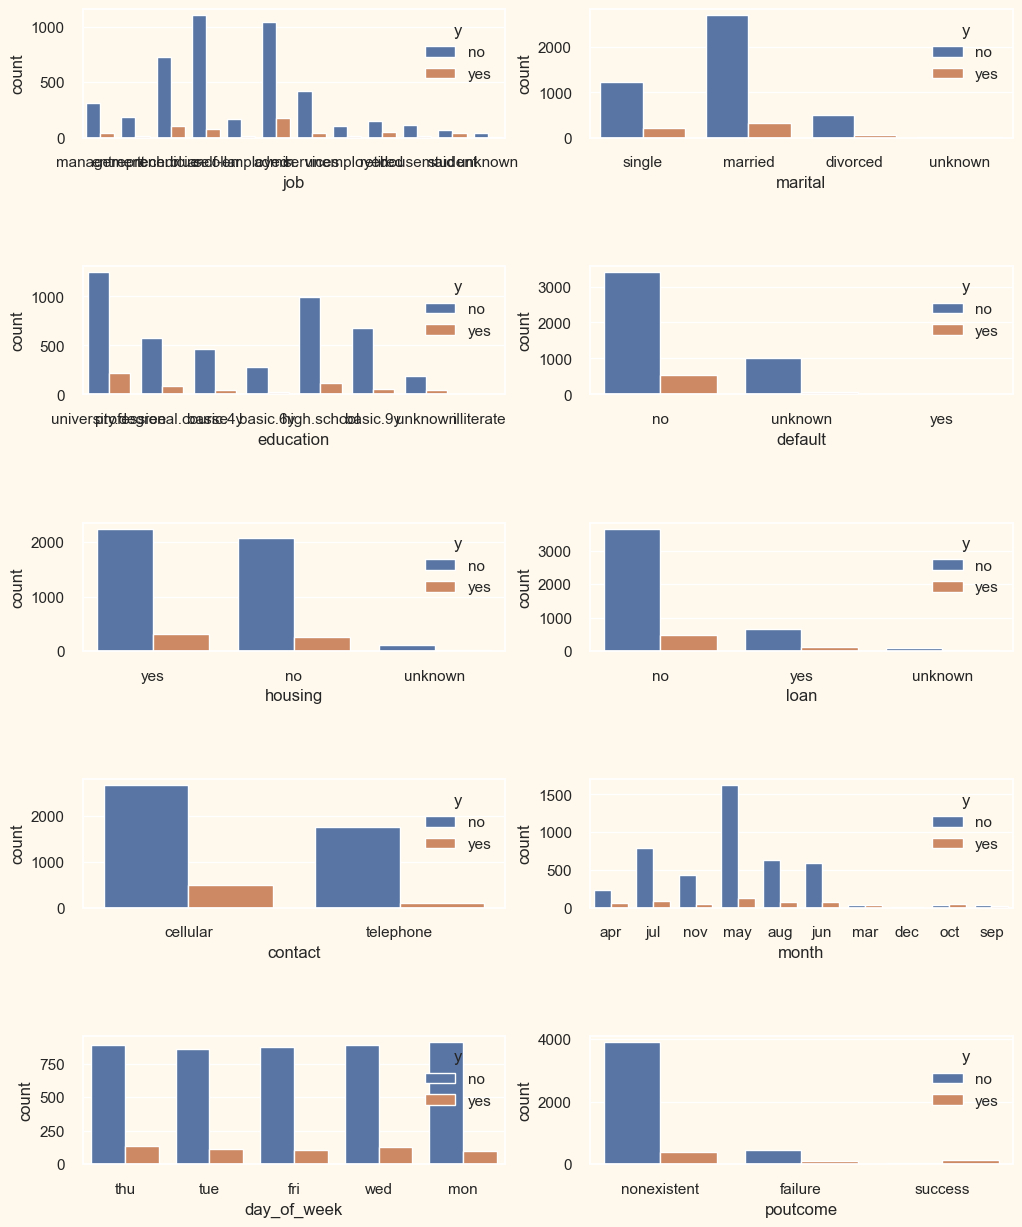

In [325]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#list of all the categoric columns
# cat = data.select_dtypes('object').columns.to_list()
fig,axes = plt.subplots(5,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='y',ax=axes[row,col])

plt.subplots_adjust(hspace=1)


<h2>Encoding data to numreic</h2>

In [326]:
#converting categorical values to numbers
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

tr_cat = data.copy()

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


<Axes: >

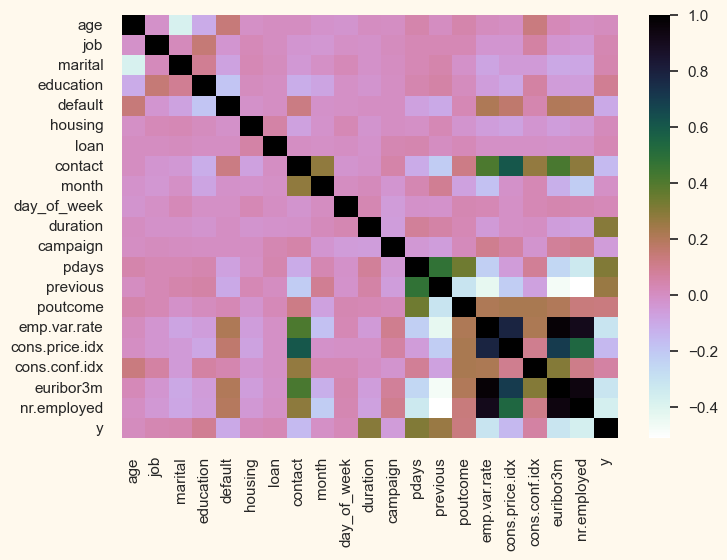

In [327]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='cubehelix_r')

<h1><b>Machine learning models</b></h1>

In [328]:
def divideclusters(n,df_clustered):

    clusters = []
    for i in range(0,n):
        clusters.append(df_clustered[df_clustered['cluster'] == i+0.0])

    sns.countplot(
    data=df_clustered,
    x="cluster", hue="y",
    palette="dark", alpha=.6
    )
    return clusters

In [329]:
def plotcluster( cluster ):
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    sns.kdeplot(x ='duration', y='previous', data = cluster, ax = ax[0], kind="hex",color="#4CB391")
    sns.countplot(x ='y', ax = ax[1], data = cluster)
    fig,axes = plt.subplots(4,2,figsize=(12,15))
    for idx,cat_col in enumerate(categorical_columns):
        row,col = idx//2,idx%2
        sns.countplot(x=cat_col,data=cluster,ax=axes[row,col])

In [330]:
def plotcluster2( df_clustered ):
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    fig,ax = plt.subplots()
    sns.countplot(data=df_clustered,x="cluster", hue="y",palette="dark", alpha=.6)
    for i in range(int(len(ax.patches) /2)):
        p1 = ax.patches[i].get_height()
        p2 = ax.patches[i + int(len(ax.patches) /2)].get_height()
        ax.annotate('%.2f'% (p1 / p2), (ax.patches[i].get_x(), ax.patches[i].get_height()), color='black')

    fig,axes = plt.subplots(5,2,figsize=(12,15))
    for idx,cat_col in enumerate(categorical_columns):
        row,col = idx//2,idx%2
        sns.countplot(
        data=df_clustered,
        x="cluster", hue=cat_col,
        palette="dark", alpha=.6,
        ax=axes[row,col]
        )

In [331]:
def plotIncomeLoanRate(clusters):
    fig,ax = plt.subplots(1,len(clusters),figsize=(len(clusters)*5,5))
    for i in range(0,len(clusters)):
        sns.kdeplot(x ='duration', y='previous', data = clusters[i], ax = ax[i], kind="hex",color="#4CB391").set(title=('cluster'+ str(i)))
        

In [332]:
y = data['y']
X = data.drop('y', axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_scale = StandardScaler().fit_transform(X)


<h2>Kmeans without do dimension reduction</h2>

Elbow Method to determine the number of clusters to be formed:


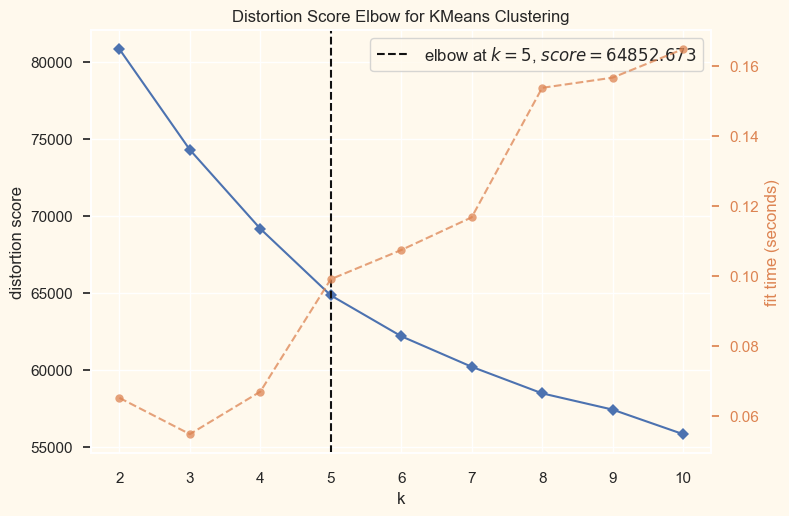

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [333]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_scale)
Elbow_M.show()

In [369]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scale)

KMeans(n_clusters=5)

<Axes: xlabel='duration', ylabel='previous'>

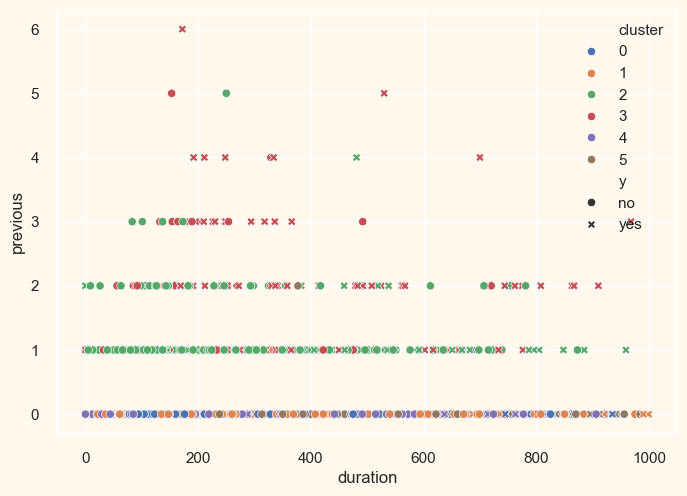

In [335]:
kmeans_clustered_tr0 = tr_cat.copy()
kmeans_clustered_tr0['cluster'] = kmeans.labels_

sns.scatterplot(data=kmeans_clustered_tr0, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

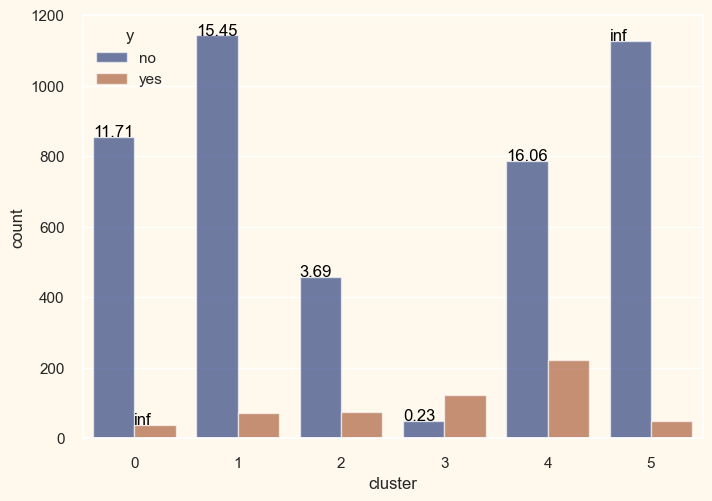

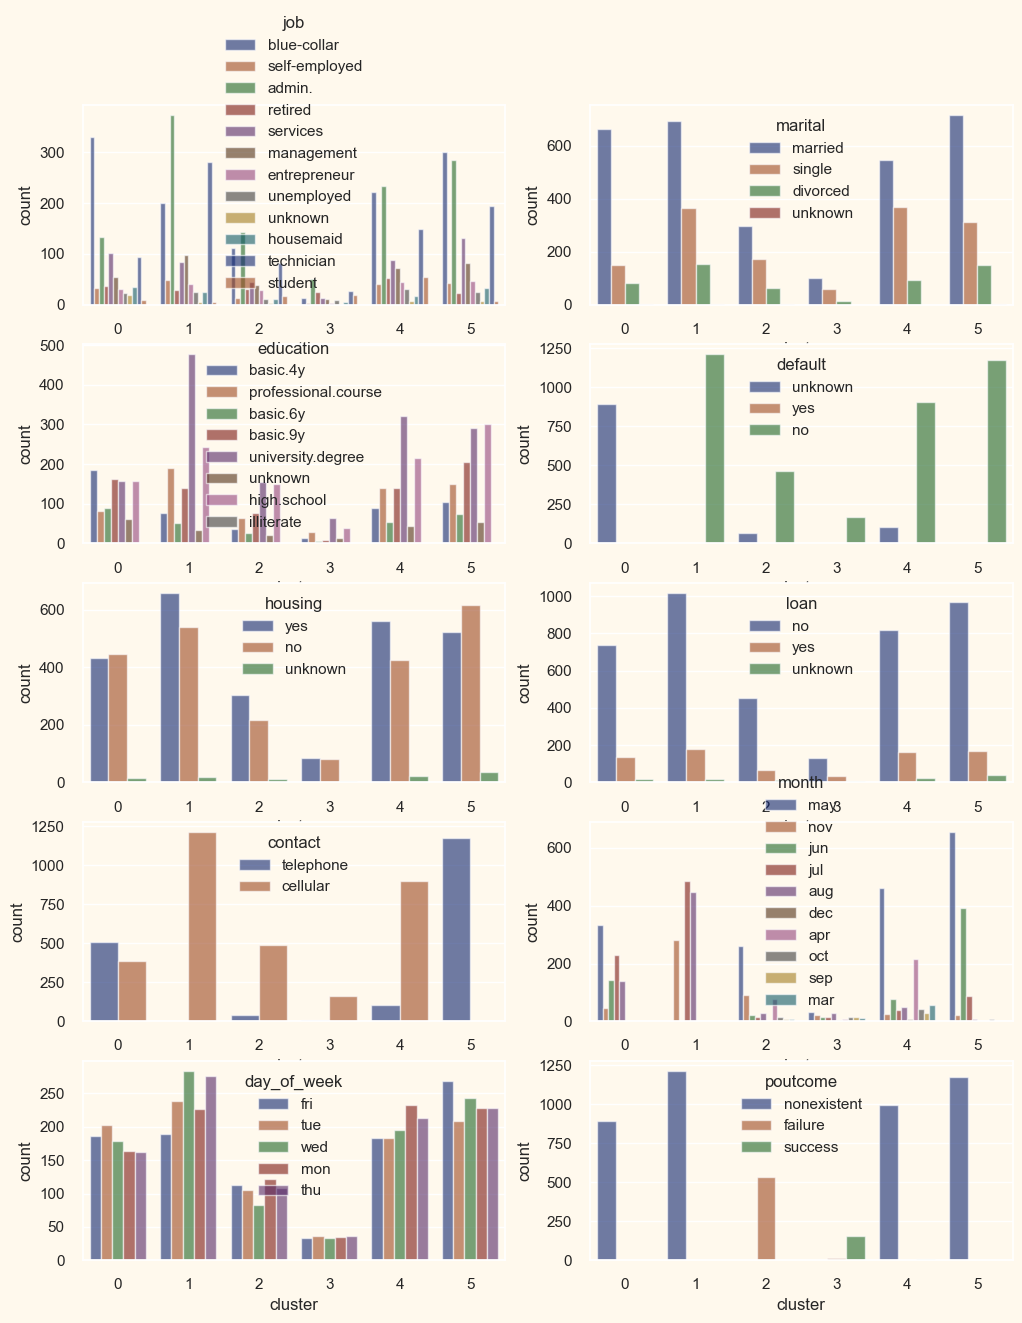

In [336]:
plotcluster2(kmeans_clustered_tr0)

<h2>PCA</h2>

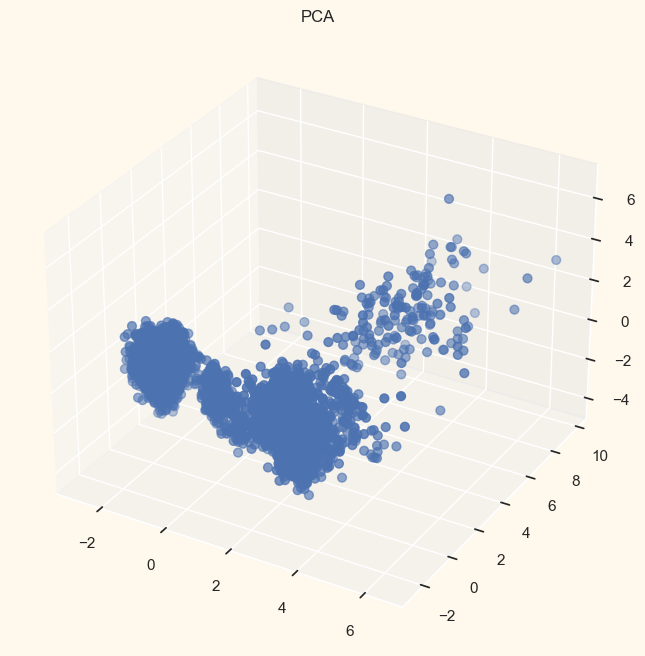

In [337]:
pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca_array = pca.transform(X_scale)
X_pca = pd.DataFrame(X_pca_array, columns=(["col1","col2", "col3"]))
x =X_pca["col1"]
y =X_pca["col2"]
z =X_pca["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("PCA")
plt.show()

<h2>K-means + PCA</h2>

Elbow Method to determine the number of clusters to be formed:


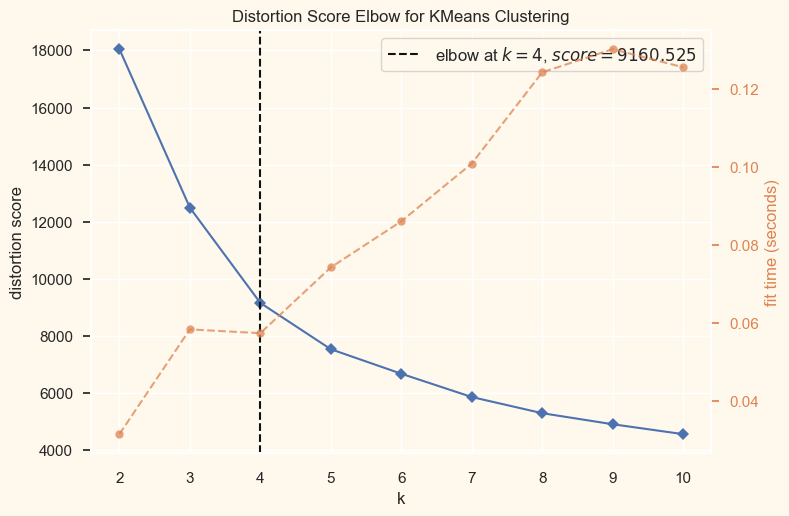

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [338]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

Text(0.5, 0, 'Number of Clusters')

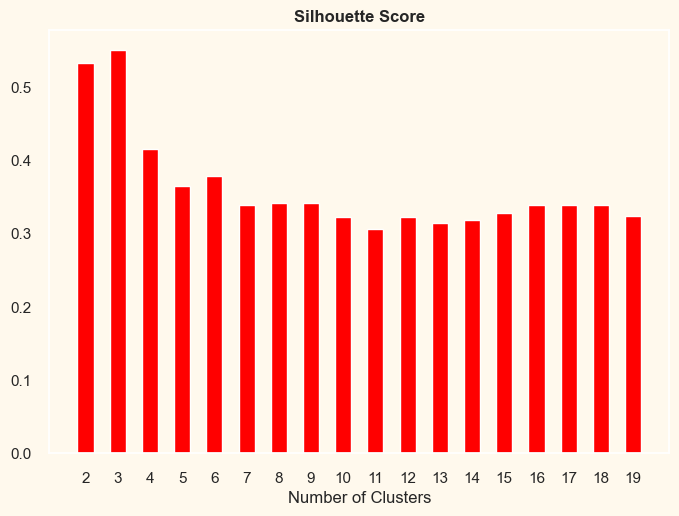

In [339]:
silhouette = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_pca)
    silhouette[i] = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')

In [340]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

KMeans(n_clusters=4)

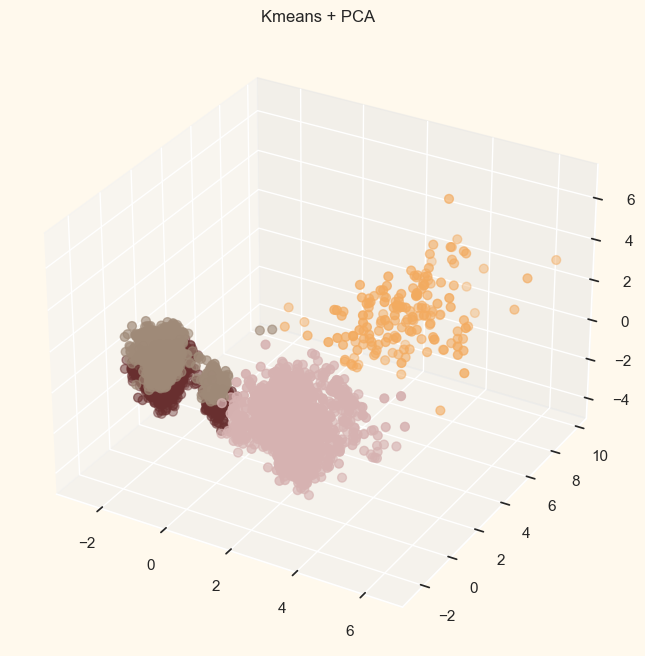

<Axes: xlabel='duration', ylabel='previous'>

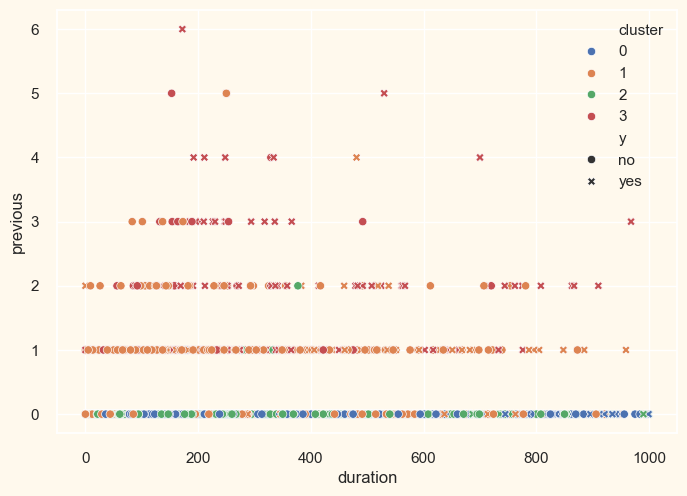

In [341]:
kmeans_result = X_pca.copy()
kmeans_clustered_tr = tr_cat.copy()

kmeans_result['cluster'] = kmeans.labels_
kmeans_clustered_tr['cluster'] = kmeans.labels_

x =kmeans_result["col1"]
y =kmeans_result["col2"]
z =kmeans_result["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans + PCA")
plt.show()

sns.scatterplot(data=kmeans_clustered_tr, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

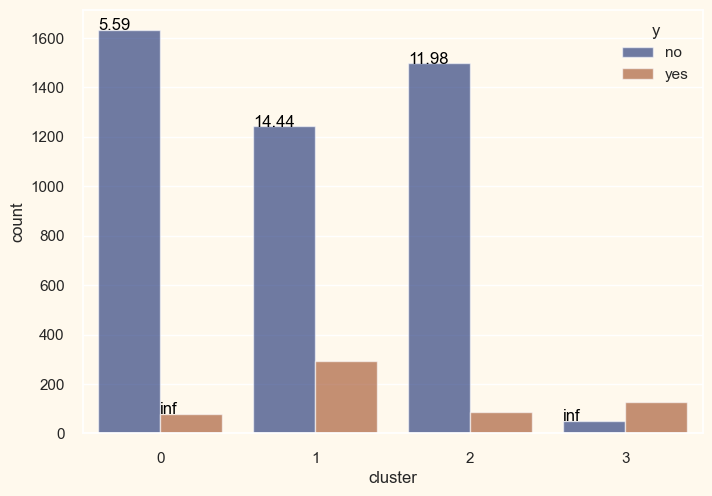

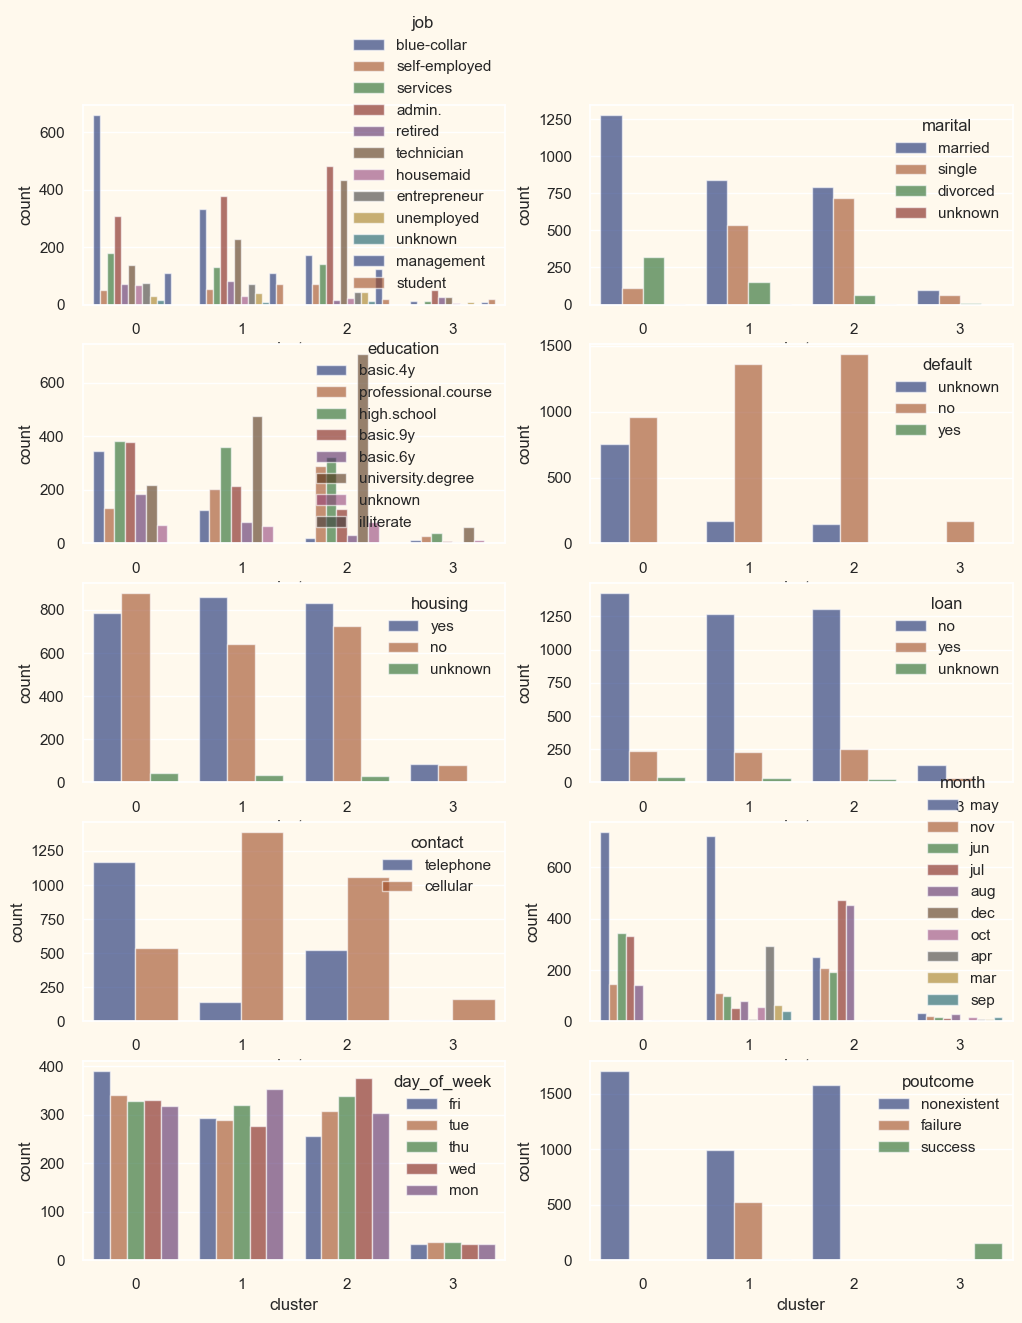

In [342]:
plotcluster2(kmeans_clustered_tr)

<h2>GMM + PCA</h2>

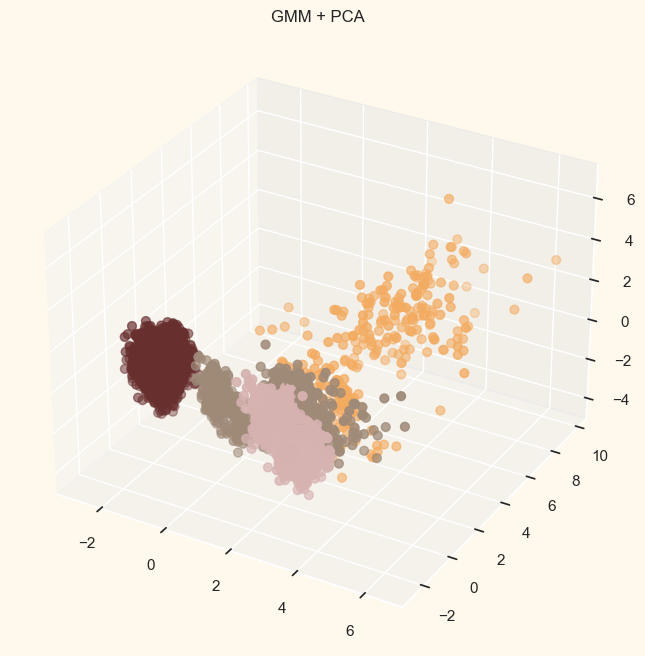

<Axes: xlabel='duration', ylabel='previous'>

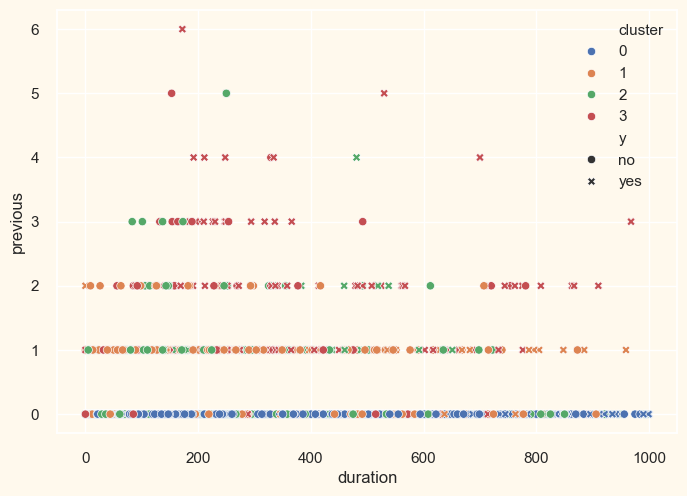

In [343]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_pca)
gmm_cluster = gmm.predict(X_pca)
gmm_result = X_pca.copy()
gmm_clustered_tr = tr_cat.copy()

gmm_result['cluster'] = gmm_cluster
gmm_clustered_tr['cluster'] = gmm_cluster

x =gmm_result["col1"]
y =gmm_result["col2"]
z =gmm_result["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + PCA")
plt.show()

sns.scatterplot(data=gmm_clustered_tr, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

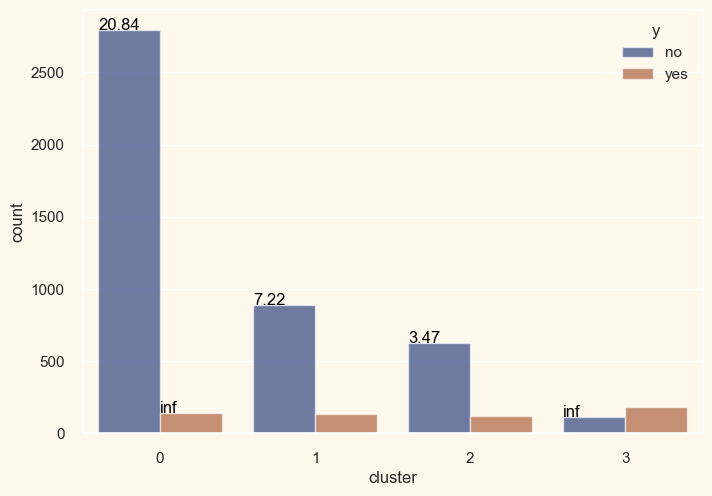

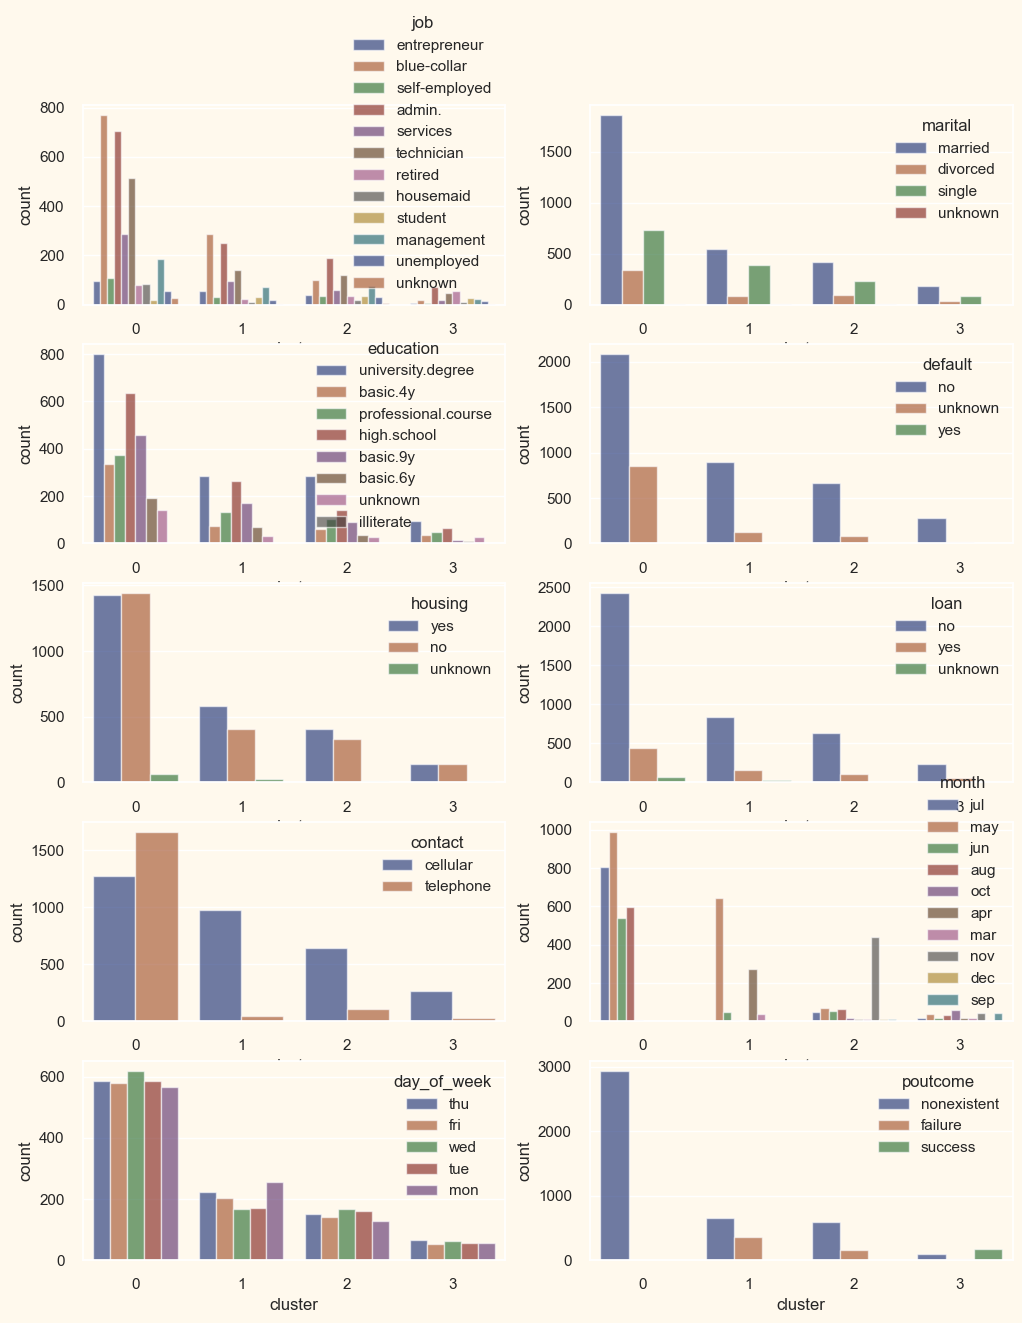

In [344]:
plotcluster2(gmm_clustered_tr)

<h2>UMAP</h2>

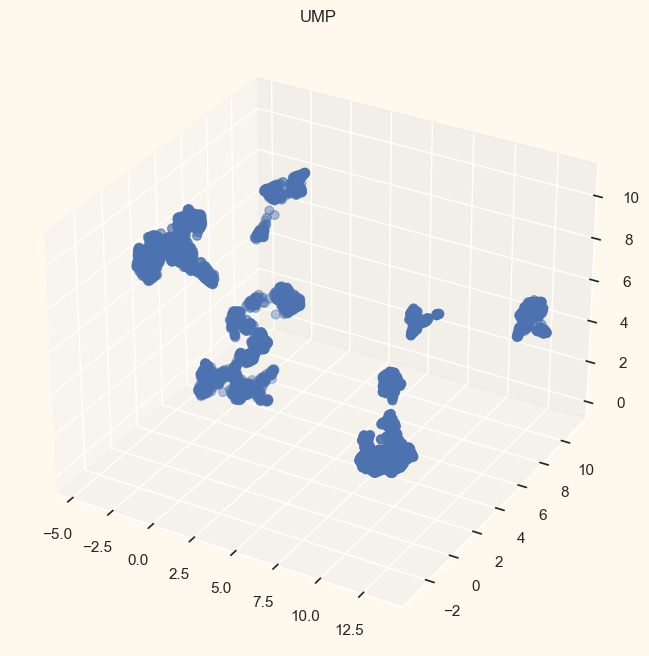

In [345]:
reducer = umap.UMAP(n_components=3)
ump = reducer.fit_transform(X_scale)
X_ump = pd.DataFrame(ump, columns=(["col1","col2","col3"]))
x =X_ump["col1"]
y =X_ump["col2"]
z =X_ump["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("UMP")
plt.show()

<h2>K-means + UMAP</h2>

Elbow Method to determine the number of clusters to be formed:


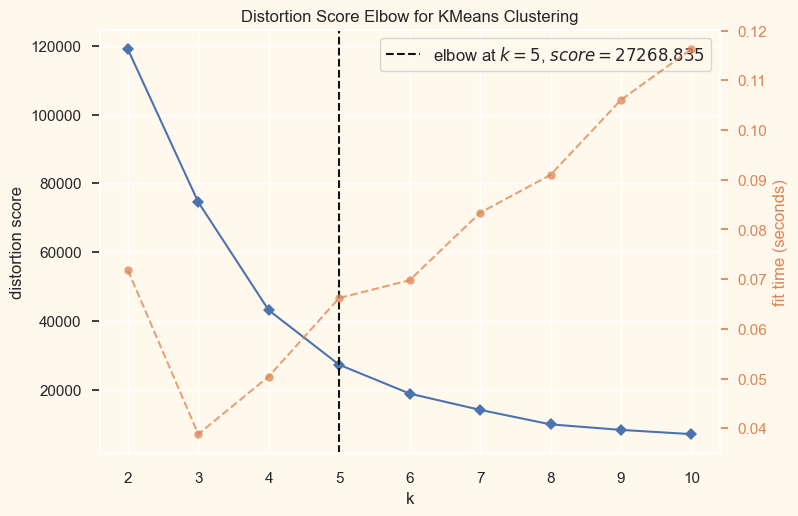

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [346]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_ump)
Elbow_M.show()

In [347]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_ump)


KMeans(n_clusters=5)

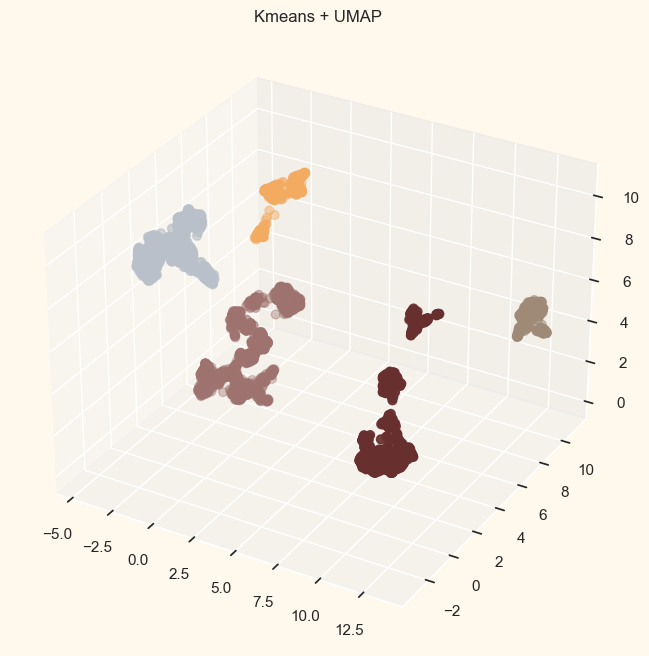

<Axes: xlabel='duration', ylabel='previous'>

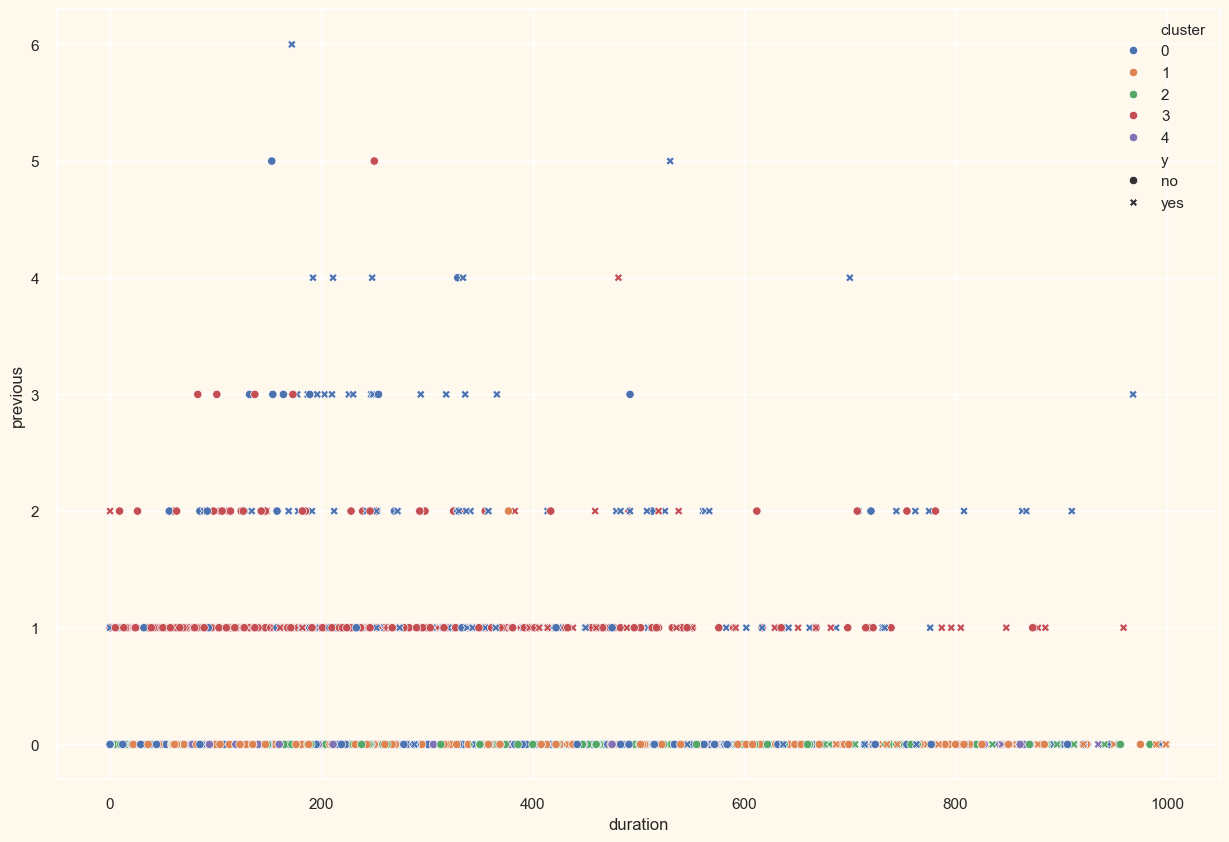

In [348]:
kmeans_result2 = X_ump.copy()
kmeans_clustered_tr2 = tr_cat.copy()

kmeans_result2['cluster'] = kmeans.labels_
kmeans_clustered_tr2['cluster'] = kmeans.labels_

x =kmeans_result2["col1"]
y =kmeans_result2["col2"]
z =kmeans_result2["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result2["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans + UMAP")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=kmeans_clustered_tr2, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

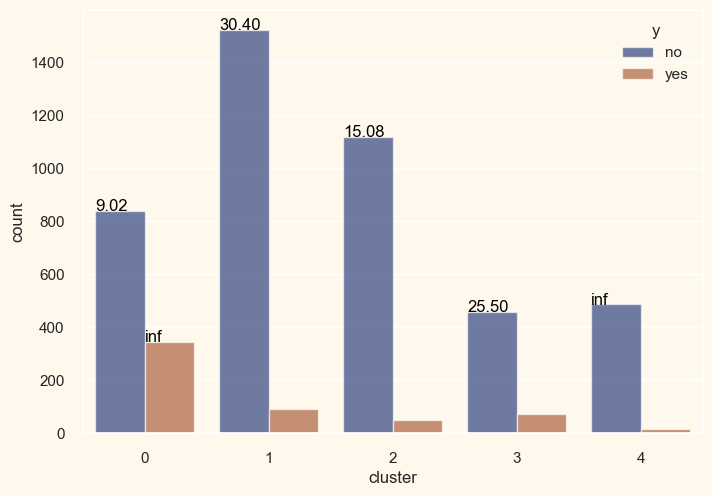

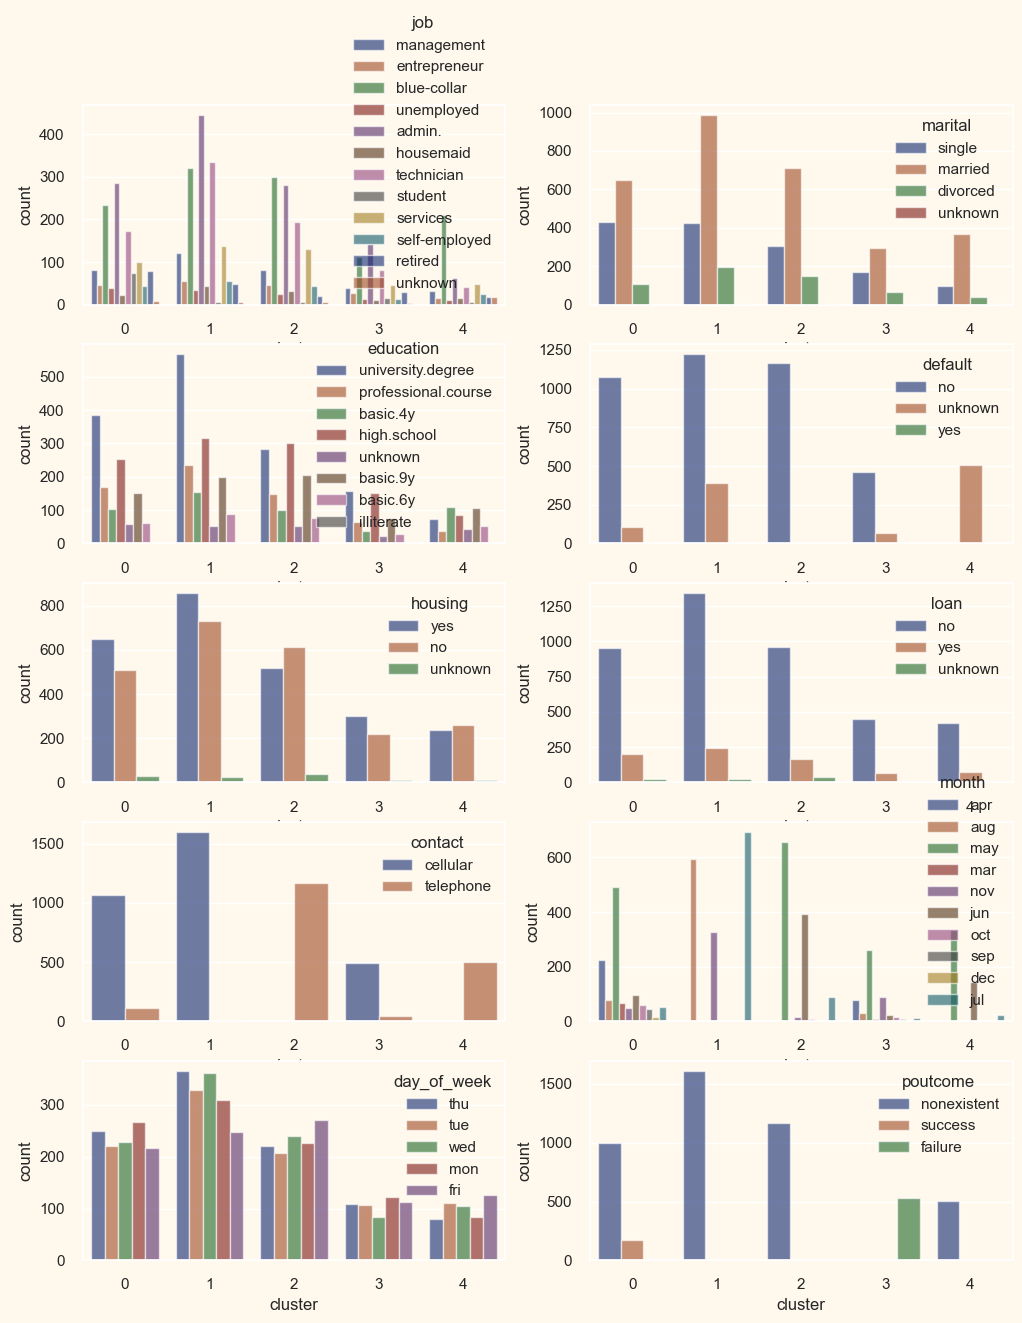

In [349]:
plotcluster2(kmeans_clustered_tr2)

<h2>GMM + UMAP</h2>

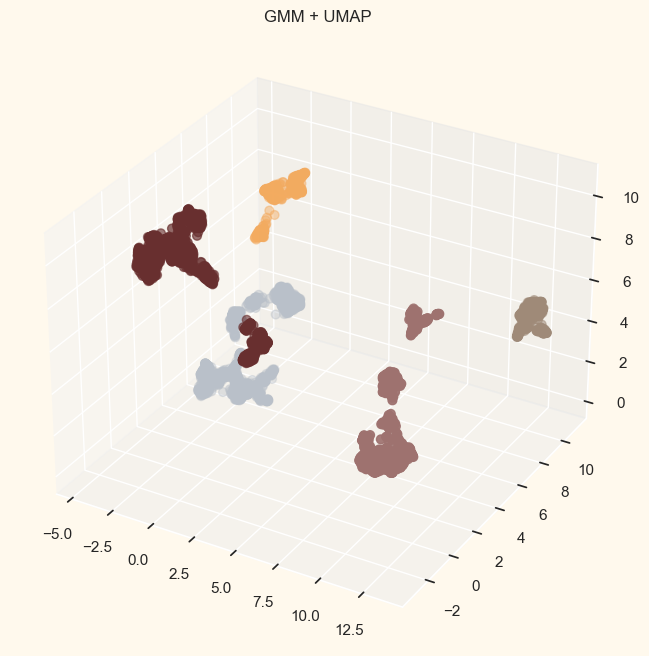

<Axes: xlabel='duration', ylabel='previous'>

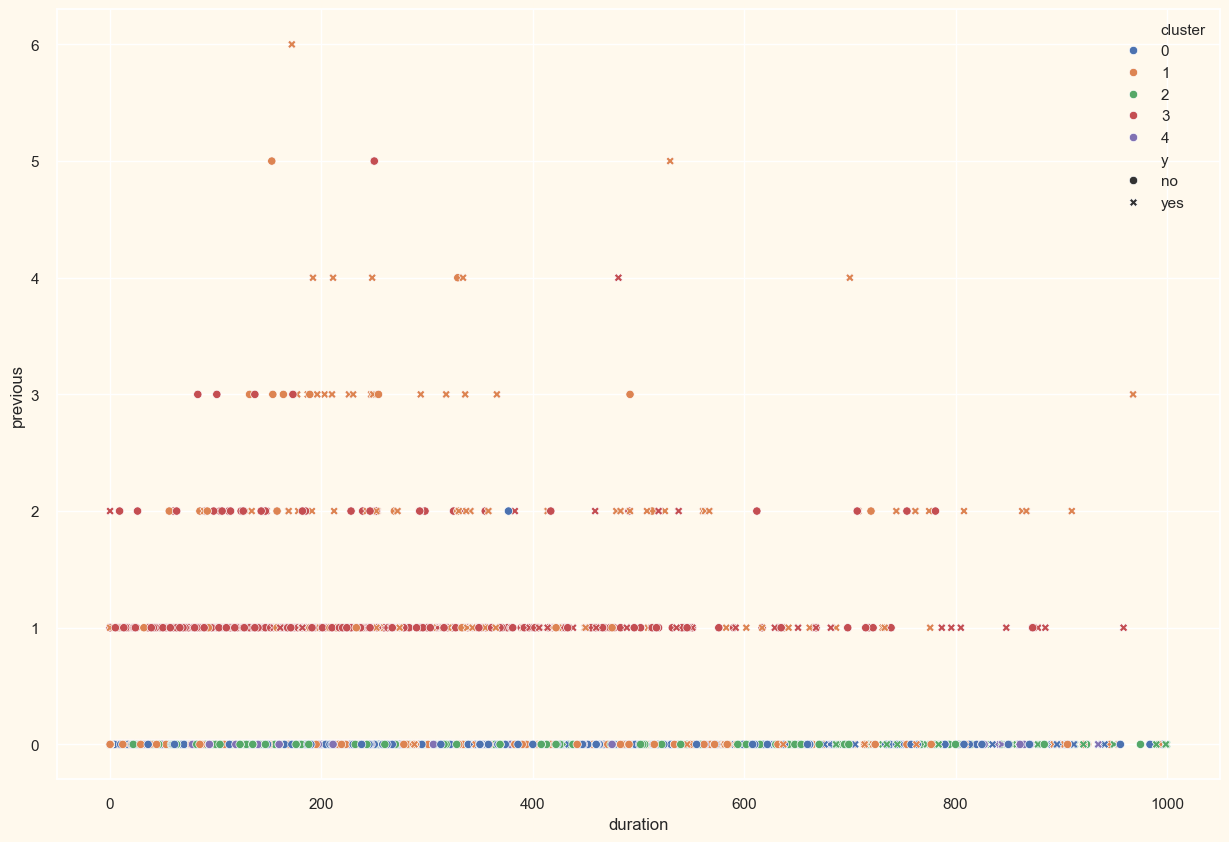

In [350]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_ump)
gmm_cluster = gmm.predict(X_ump)
gmm_result2 = X_ump.copy()
gmm_clustered_tr2 = tr_cat.copy()

gmm_result2['cluster'] = gmm_cluster
gmm_clustered_tr2['cluster'] = gmm_cluster

x =gmm_result2["col1"]
y =gmm_result2["col2"]
z =gmm_result2["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result2["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + UMAP")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=gmm_clustered_tr2, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

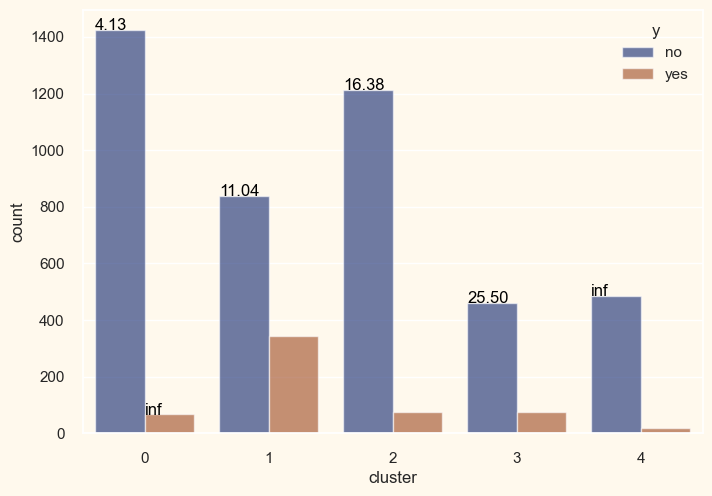

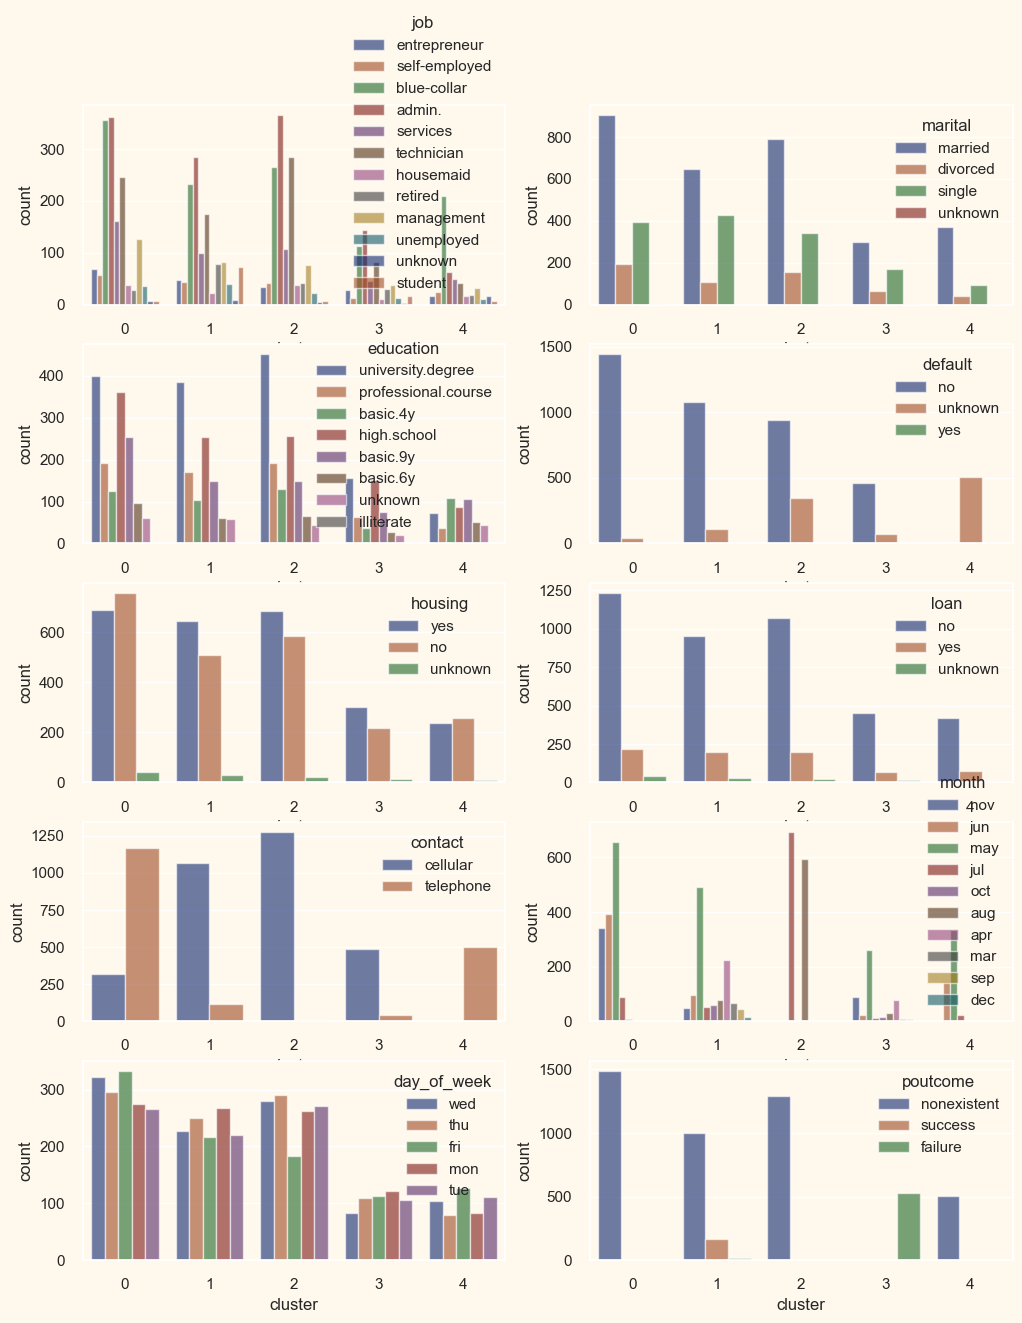

In [351]:
plotcluster2(gmm_clustered_tr2)

<h2>ICA</h2>

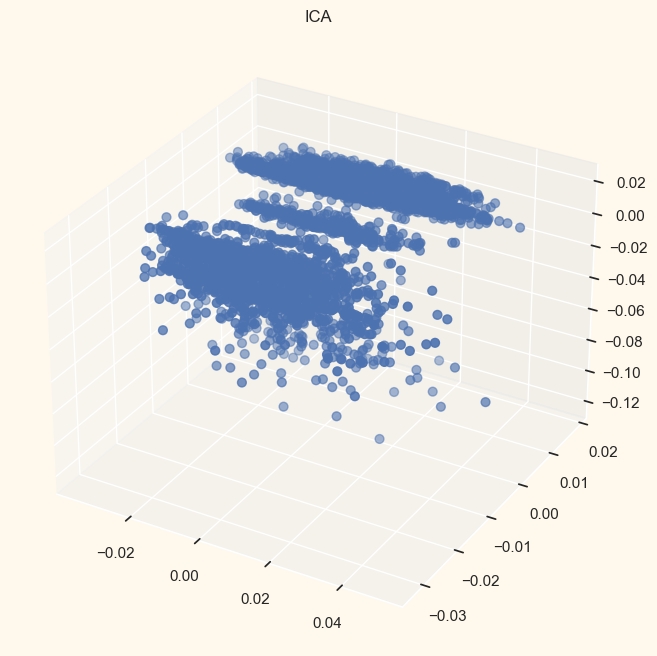

In [352]:
ICA = FastICA(n_components=3)

ica = ICA.fit_transform(X_scale)

X_ica = pd.DataFrame(ica, columns=(["col1","col2","col3"]))
x =X_ica["col1"]
y =X_ica["col2"]
z =X_ica["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("ICA")
plt.show()

<h2>K-means + ICA</h2>

Elbow Method to determine the number of clusters to be formed:


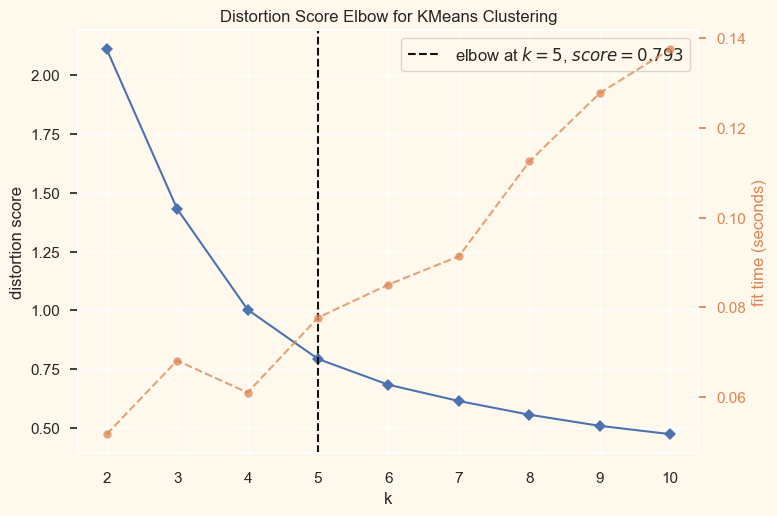

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [353]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_ica)
Elbow_M.show()

In [354]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_ica)


KMeans(n_clusters=5)

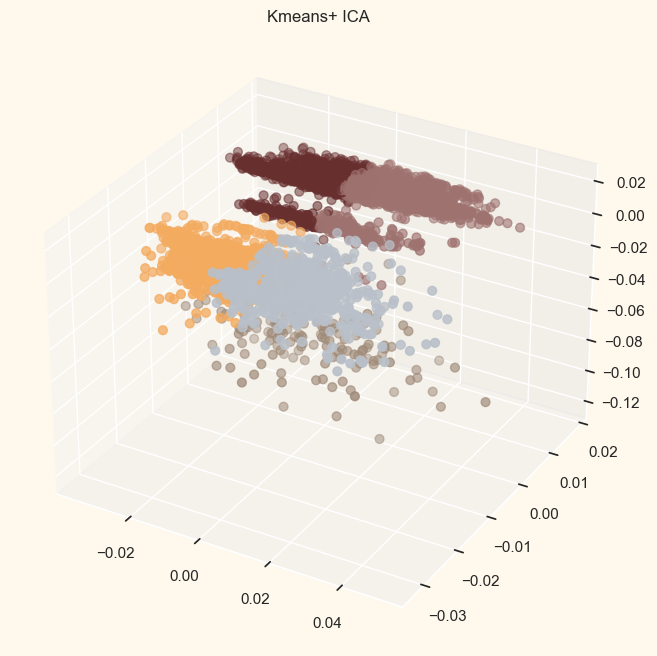

<Axes: xlabel='duration', ylabel='previous'>

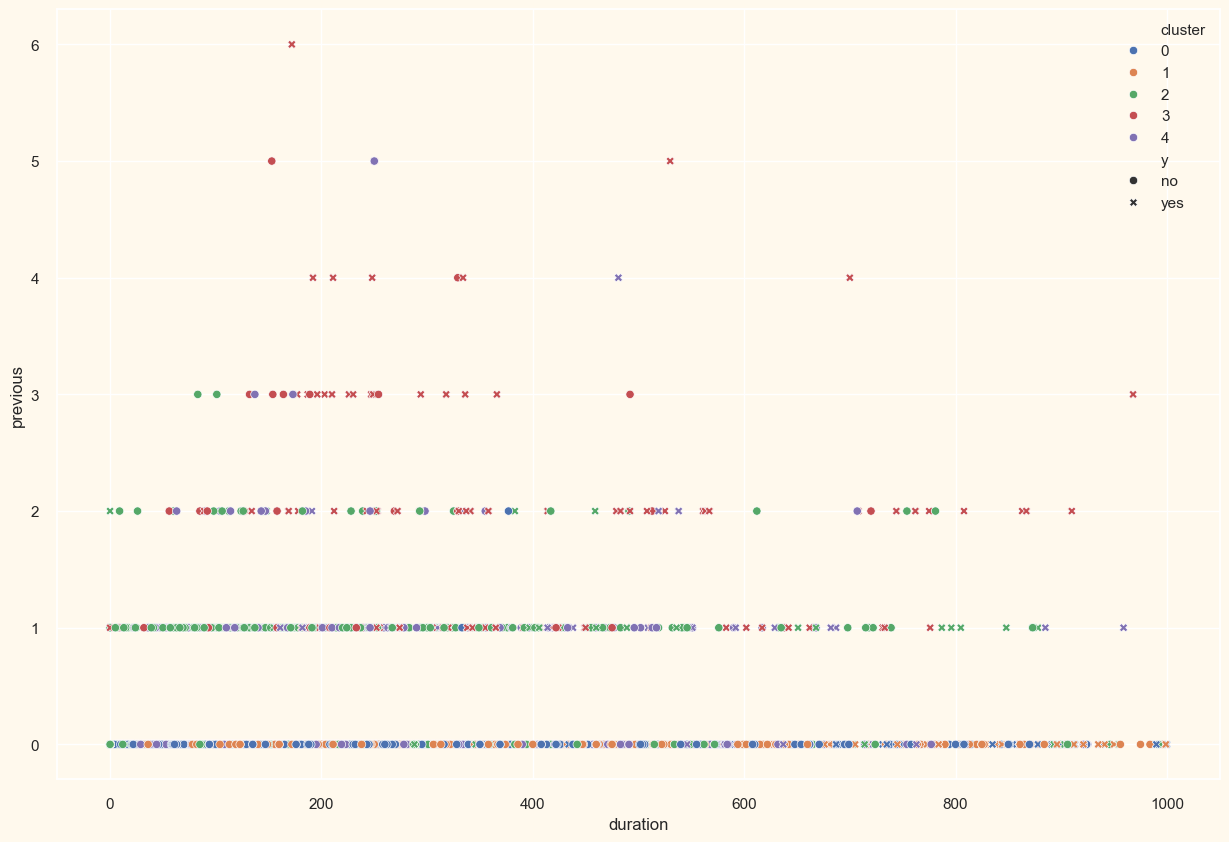

In [355]:
kmeans_result3 = X_ica.copy()
kmeans_clustered_tr3 = tr_cat.copy()

kmeans_result3['cluster'] = kmeans.labels_
kmeans_clustered_tr3['cluster'] = kmeans.labels_

x =kmeans_result3["col1"]
y =kmeans_result3["col2"]
z =kmeans_result3["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result3["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans+ ICA")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=kmeans_clustered_tr3, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

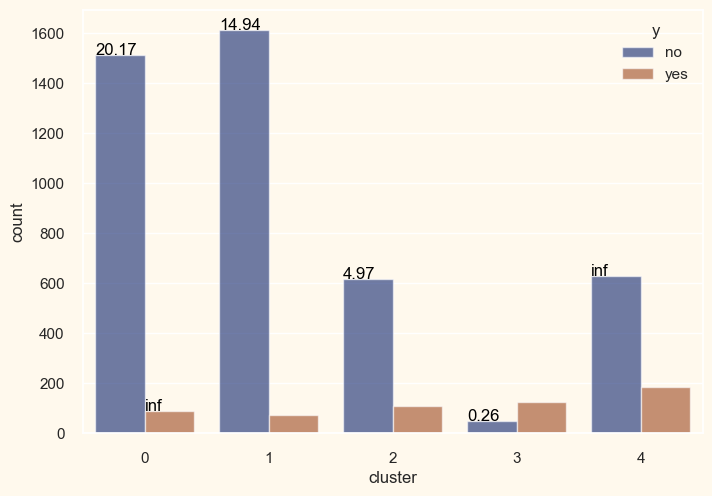

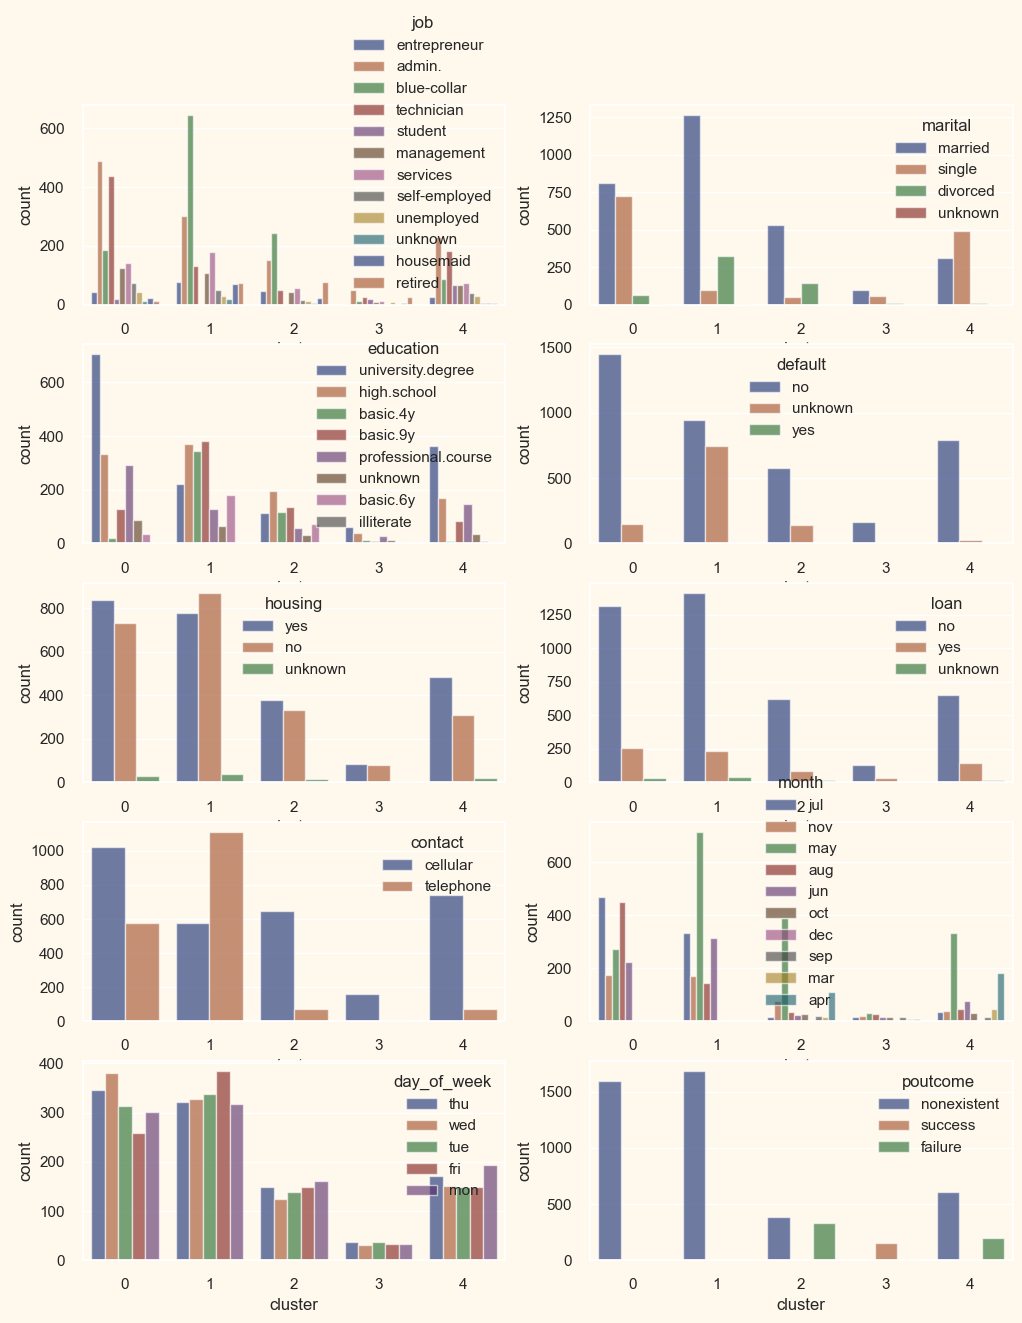

In [356]:
plotcluster2(kmeans_clustered_tr3)

</h2>GMM + ICA</h2>

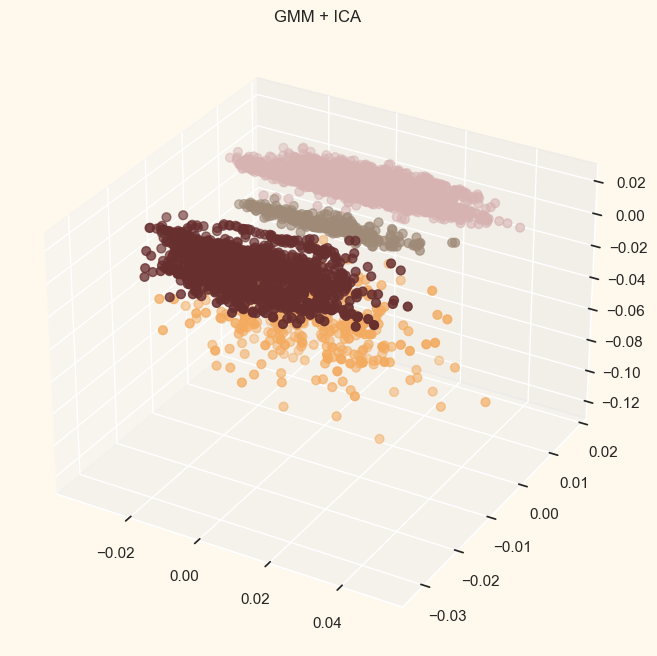

<Axes: xlabel='duration', ylabel='previous'>

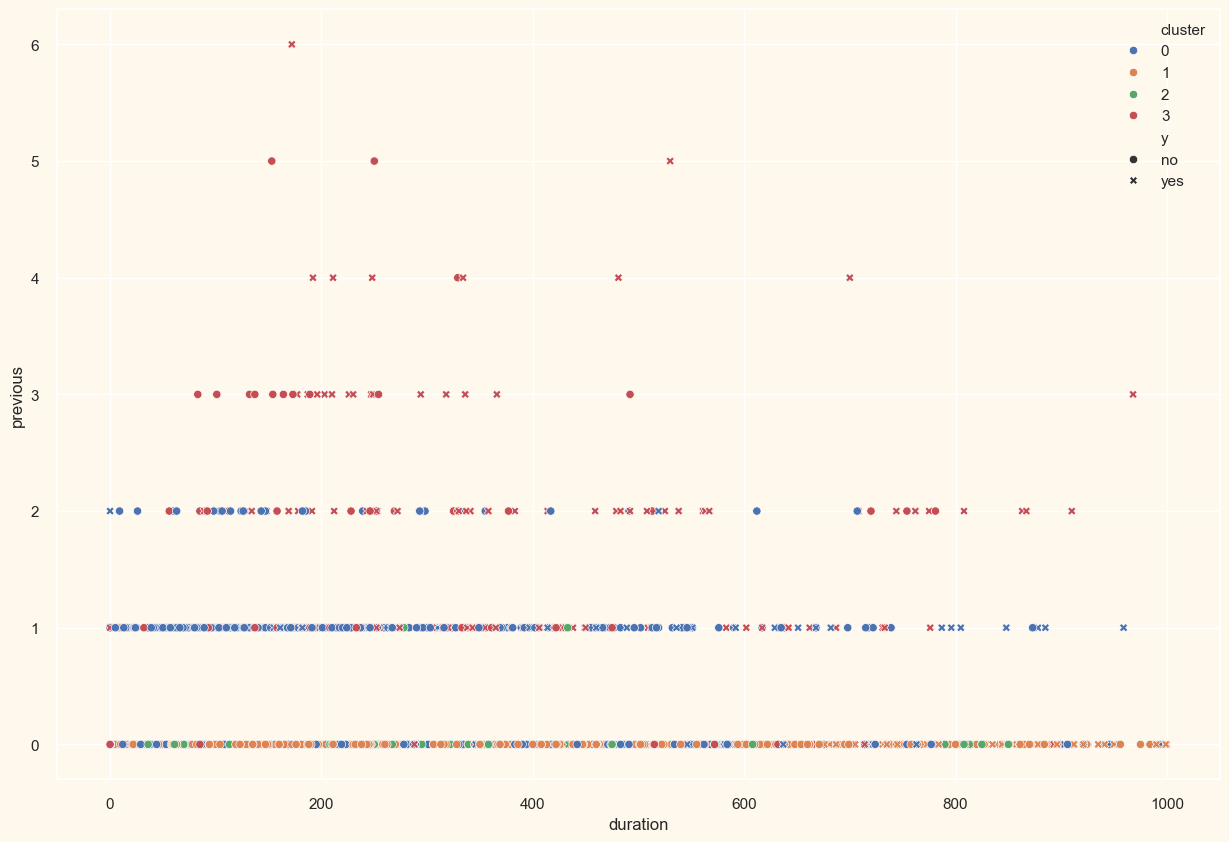

In [357]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_ica)
gmm_cluster = gmm.predict(X_ica)
gmm_result3 = X_ica.copy()
gmm_clustered_tr3 = tr_cat.copy()

gmm_result3['cluster'] = gmm_cluster
gmm_clustered_tr3['cluster'] = gmm_cluster

x =gmm_result3["col1"]
y =gmm_result3["col2"]
z =gmm_result3["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result3["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + ICA")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=gmm_clustered_tr3, x='duration', y='previous', hue='cluster',style='y',palette = sns.color_palette())

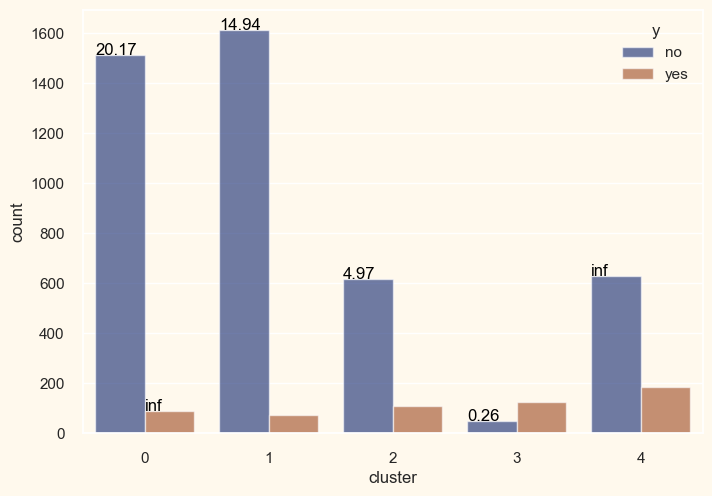

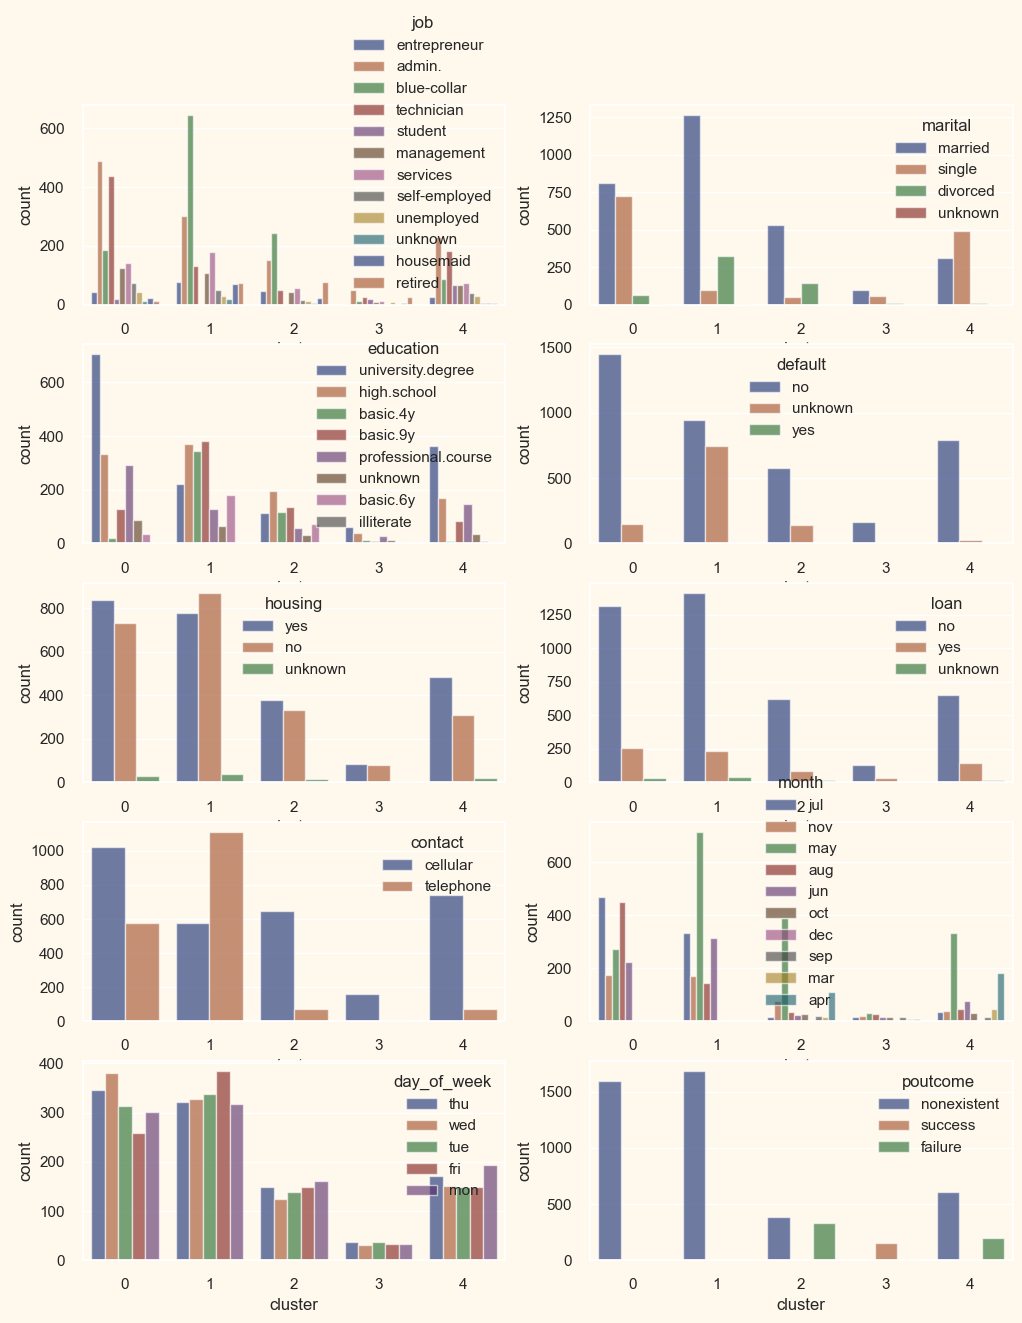

In [358]:
plotcluster2(kmeans_clustered_tr3)

<h1>Rerun Neural Network</h1>

In [359]:
y = data['y']
X = data.drop('y', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X.shape

(5000, 20)

In [360]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}


In [361]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(20, 20),activation='relu')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_MLP = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_ORIGIN=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       445
           1       0.64      0.53      0.58        55

    accuracy                           0.92       500
   macro avg       0.79      0.75      0.77       500
weighted avg       0.91      0.92      0.91       500

91.6% Accurate


In [362]:
y = data['y']
X = X_pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [363]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}


In [364]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(10, 10, 10),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_PCA = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print("pca column",f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_PCA=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       445
           1       0.74      0.31      0.44        55

    accuracy                           0.91       500
   macro avg       0.83      0.65      0.69       500
weighted avg       0.90      0.91      0.90       500

pca column 91.2% Accurate


In [365]:
X = kmeans_clustered_tr2['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [366]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(10, 10, 10),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_CLUSTER = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print("cluster column",f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_CLUSTR=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       445
           1       0.00      0.00      0.00        55

    accuracy                           0.89       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.79      0.89      0.84       500

cluster column 89.0% Accurate


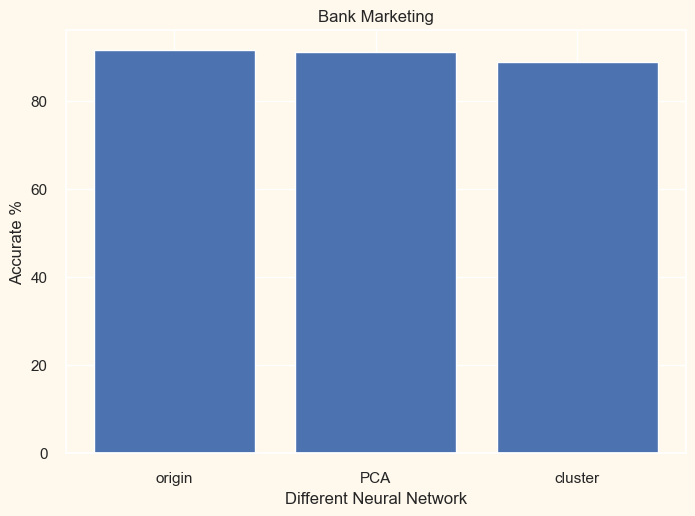

[91.6, 91.2, 89.0]


In [367]:
acc = [MLP_SC_ORIGIN, MLP_SC_PCA, MLP_SC_CLUSTR]
labels = ['origin', 'PCA', 'cluster']
plt.bar(range(len(acc)), acc, tick_label=labels)
plt.xlabel('Different Neural Network')
plt.ylabel('Accurate %')
plt.title('Bank Marketing')
plt.show()
print(acc)

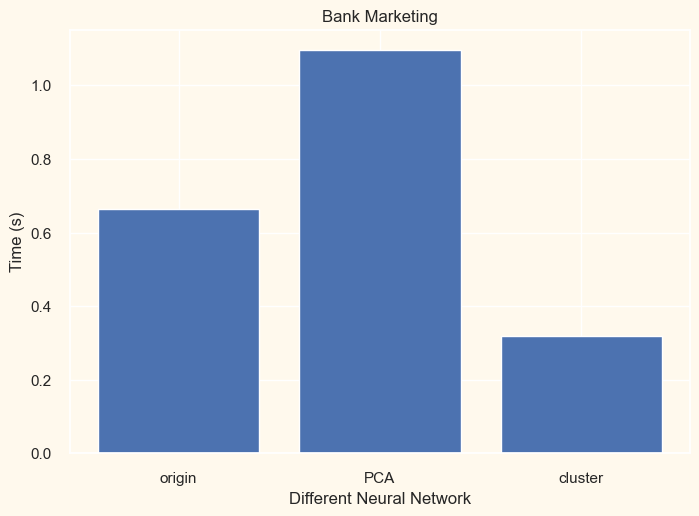

[0.6626131534576416, 1.0957200527191162, 0.31847095489501953]


In [368]:
time = [time_MLP, time_PCA, time_CLUSTER]
labels = ['origin', 'PCA', 'cluster']
plt.bar(range(len(time)), time, tick_label=labels)
plt.xlabel('Different Neural Network')
plt.ylabel('Time (s)')
plt.title('Bank Marketing')
plt.show()
print(time)